In [2]:
# Importing necessary packages
import xgboost as xgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive .mount('/content/drive/')

Mounted at /content/drive/


In [12]:
abalone_data = pd.read_csv("/content/drive/MyDrive/Dataset/abalone.csv")
abalone_data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [13]:
X = abalone_data.drop("Rings", axis=1)
y = abalone_data["Rings"]


In [14]:
# Convert categorical feature 'Sex' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=["Sex"], drop_first=True)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Creating an XGBRegressor model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# Save the XGBoost model in binary format
model.save_model("model.json")


In [18]:
# Load the model from the saved binary file
loaded_model = xgb.XGBRegressor()
loaded_model.load_model("model.json")

In [19]:
# SHAP Explainer
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X_test)

# Initialize the SHAP JavaScript library
shap.initjs()

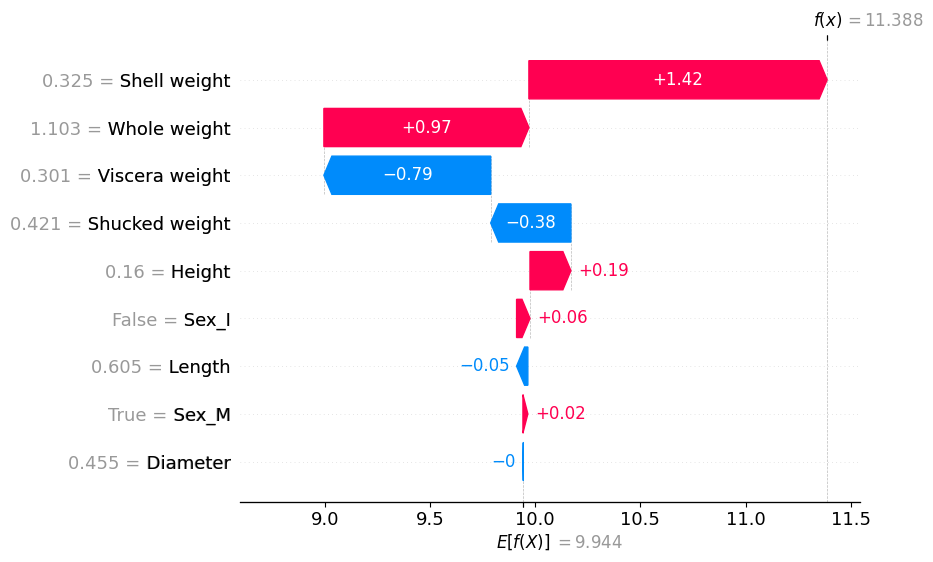

In [20]:
# Load the model from the saved binary file watterfall plot
loaded_model = xgb.XGBRegressor()
loaded_model.load_model("model.json")

# Initialize SHAP explainer
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X_test)

# Display SHAP waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

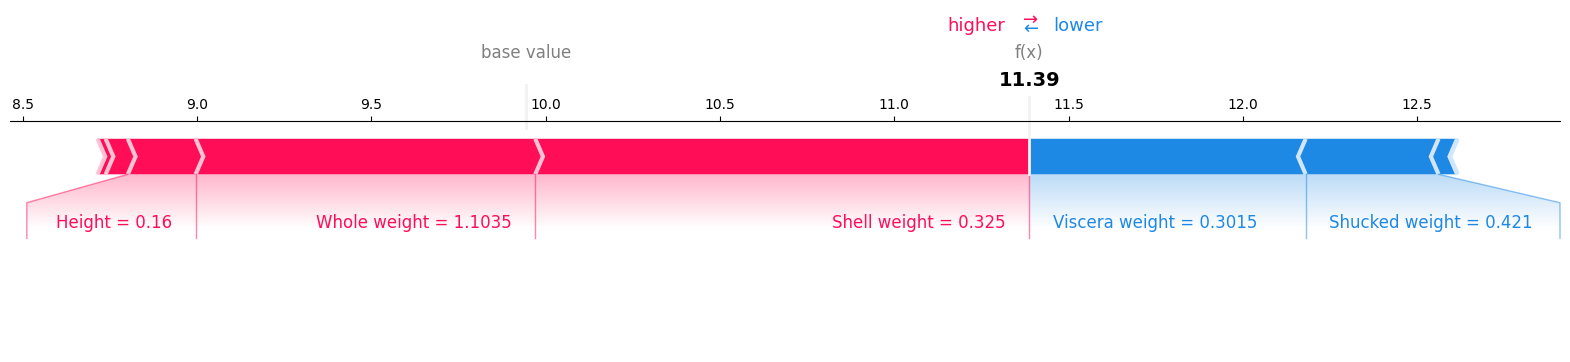

In [21]:
# Create a SHAP explainer for the model forced plot
explainer = shap.Explainer(model)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# If SHAP values are an Explanation object, extract the values
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values

# Force plot for the first observation with matplotlib
# The expected_value is the model's expected output for the dataset
# The shap_values[0] represents the SHAP values for the first observation
# X_test.iloc[0, :] is the corresponding feature values for the first observation
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib=True)

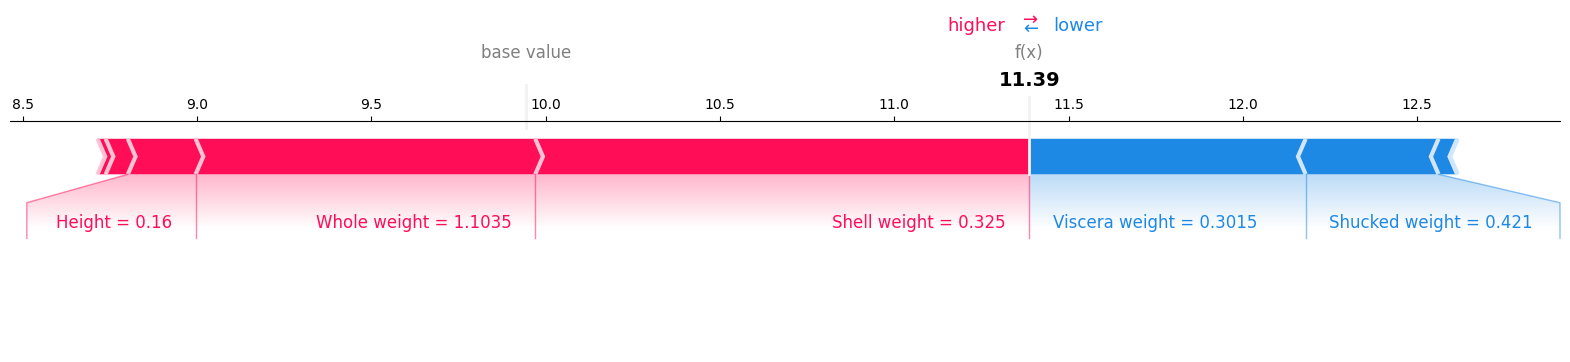

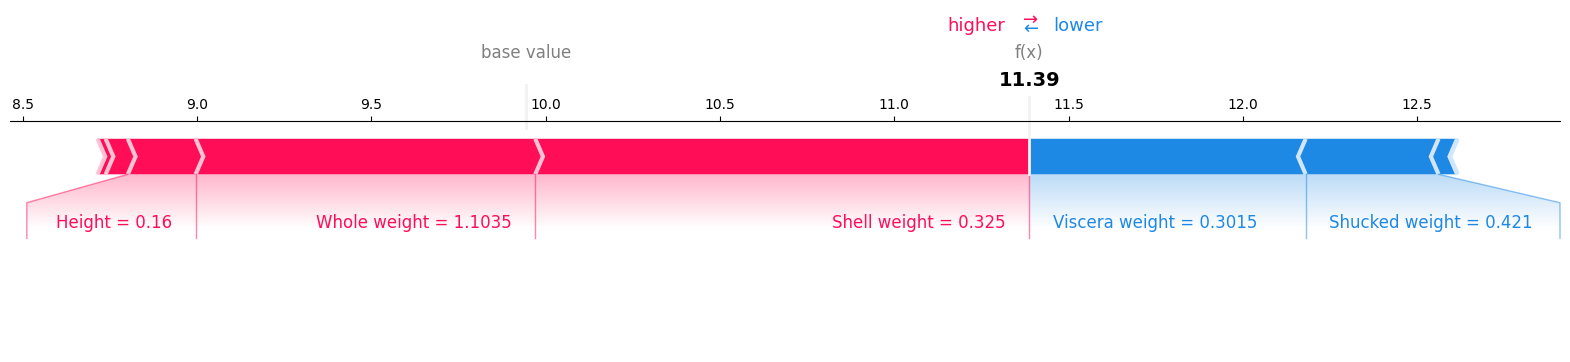

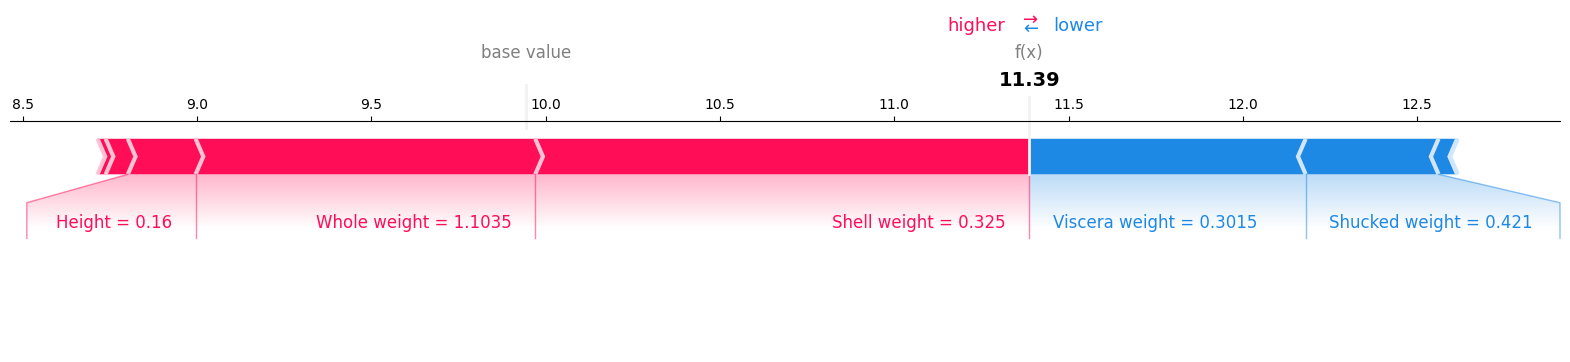

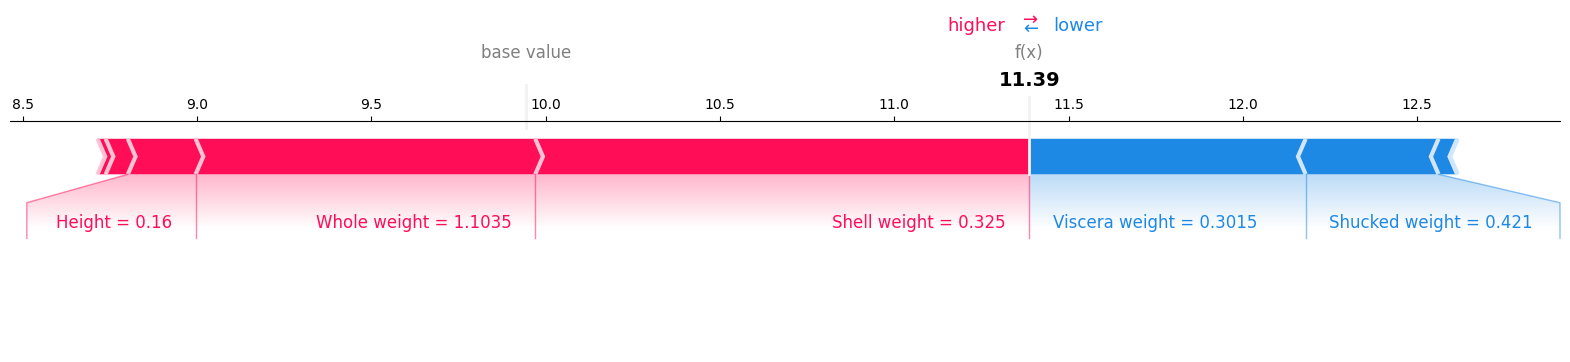

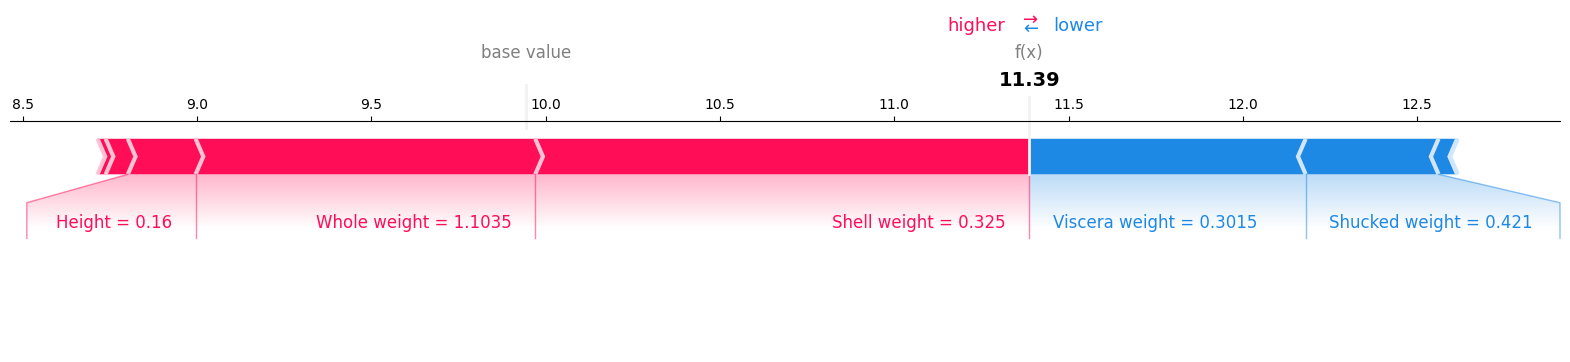

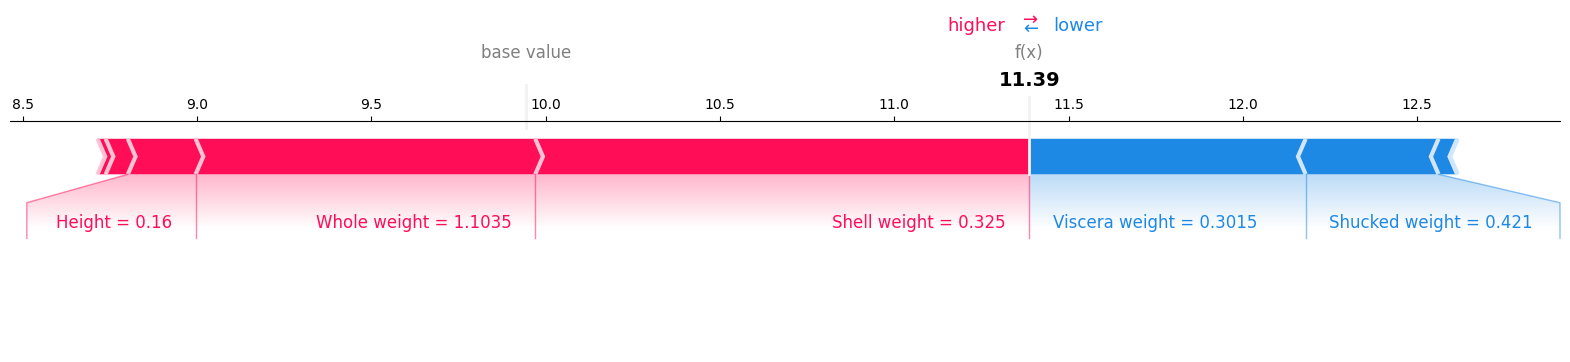

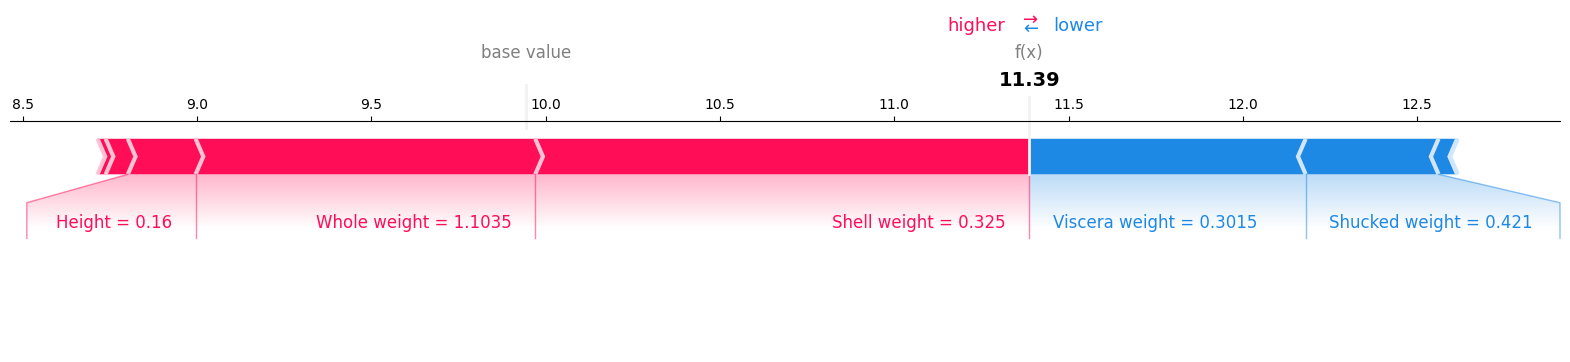

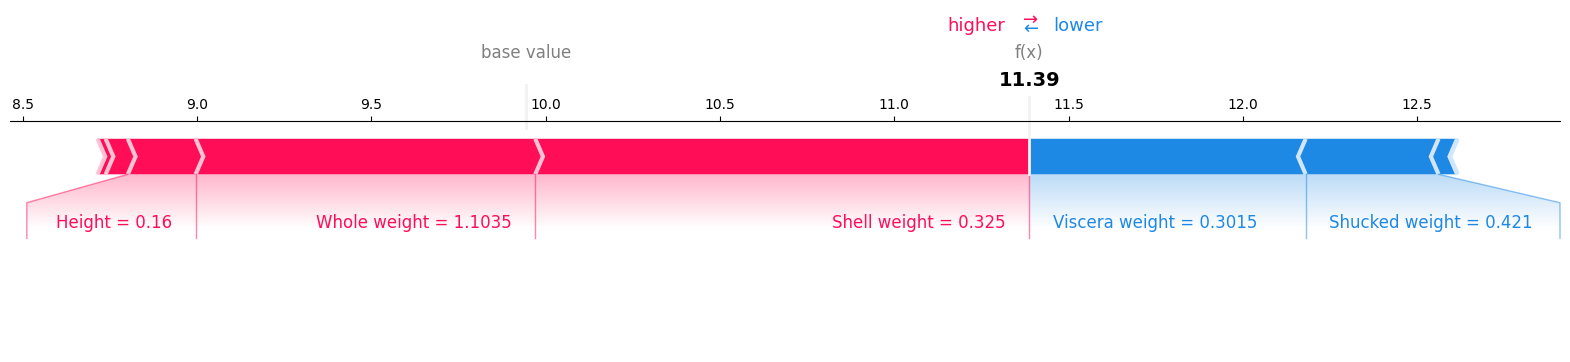

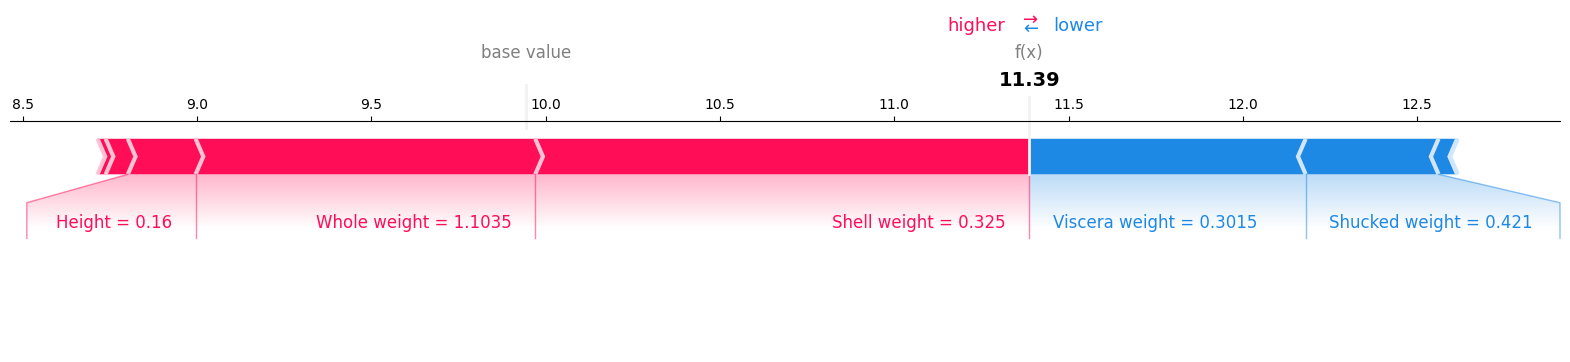

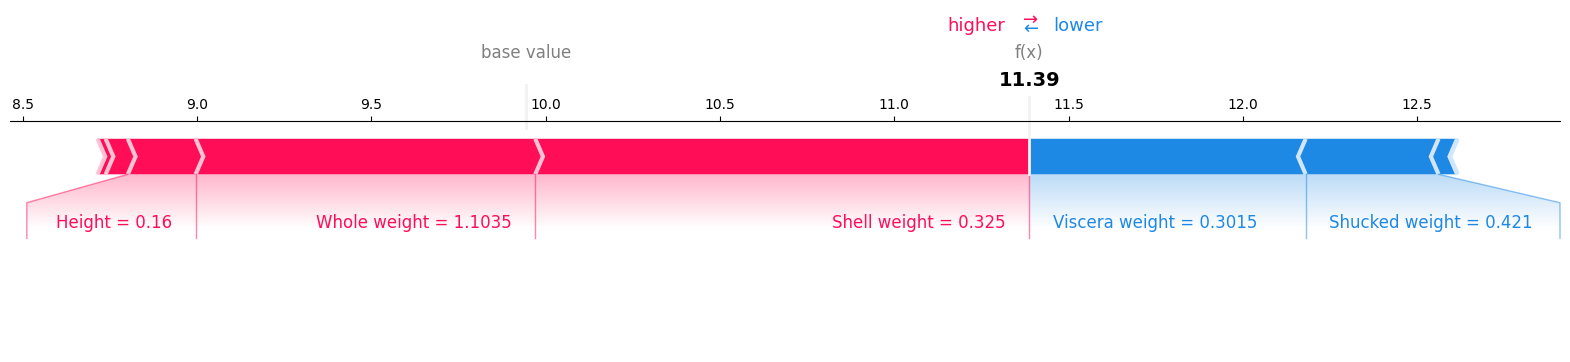

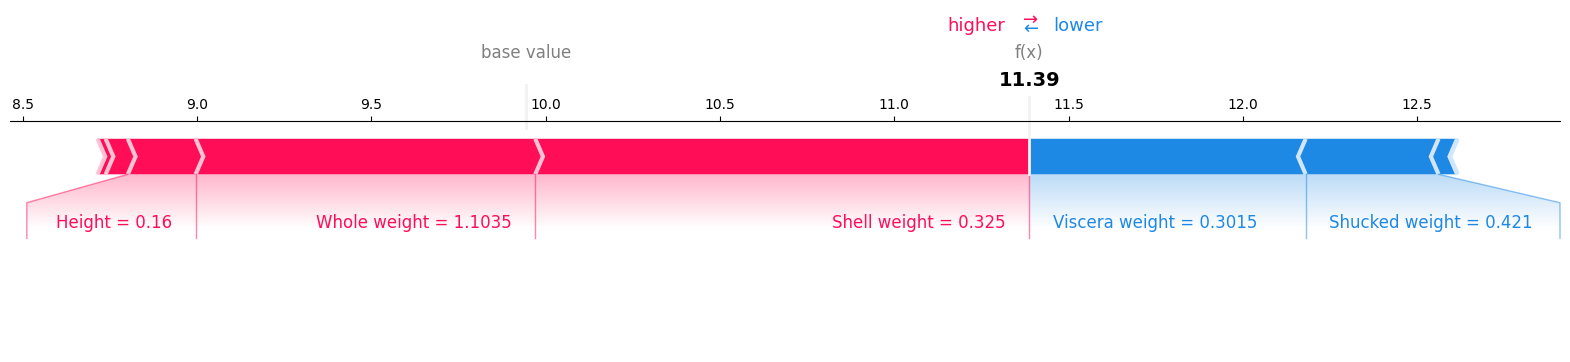

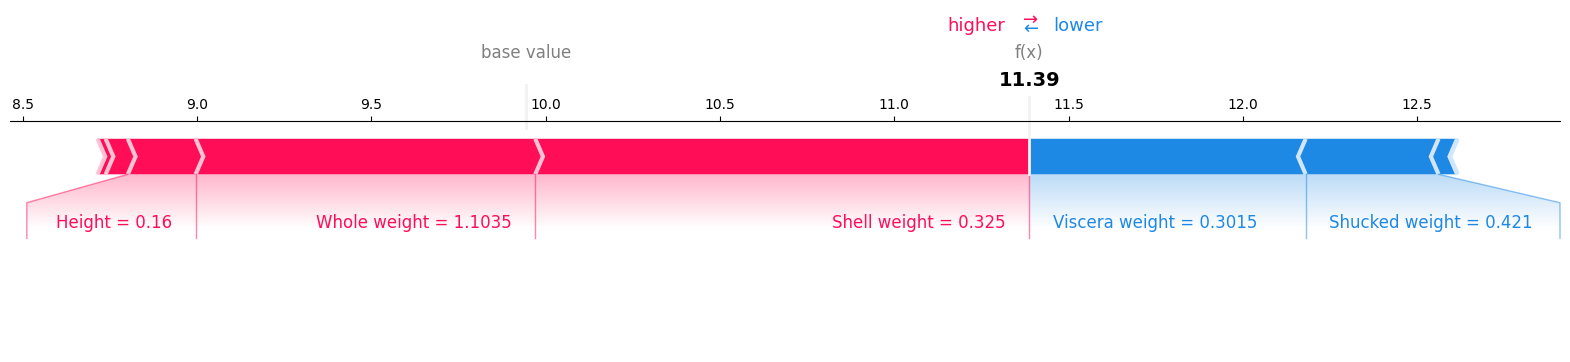

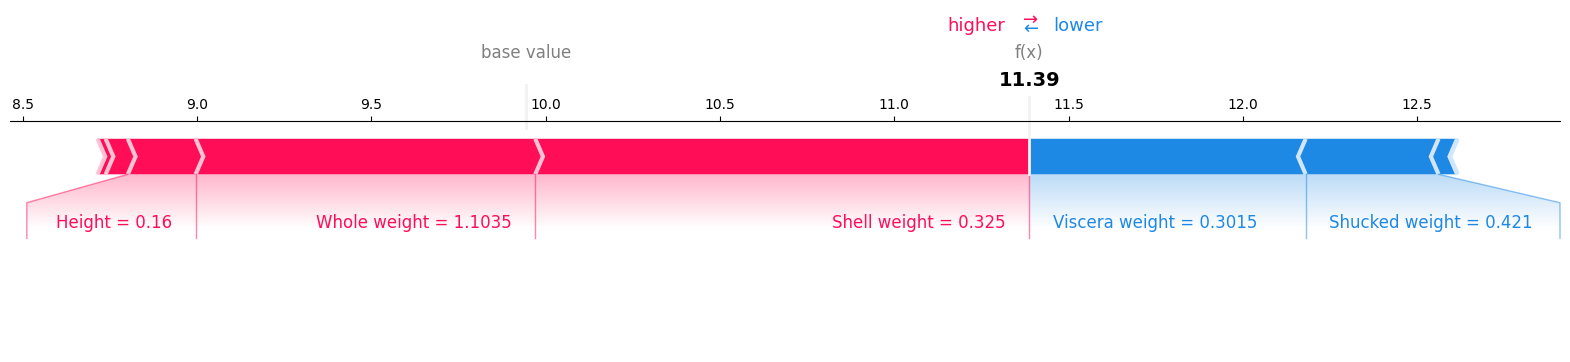

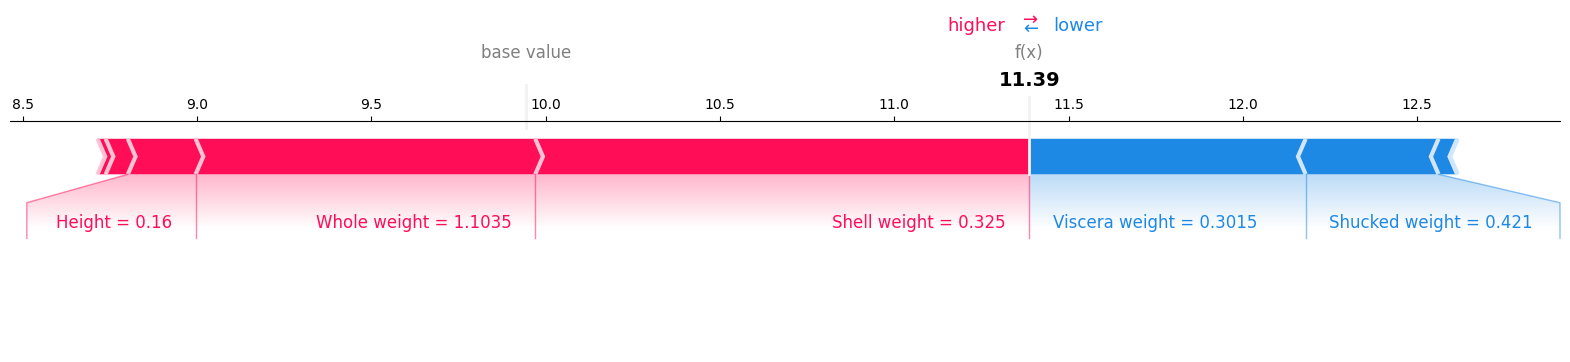

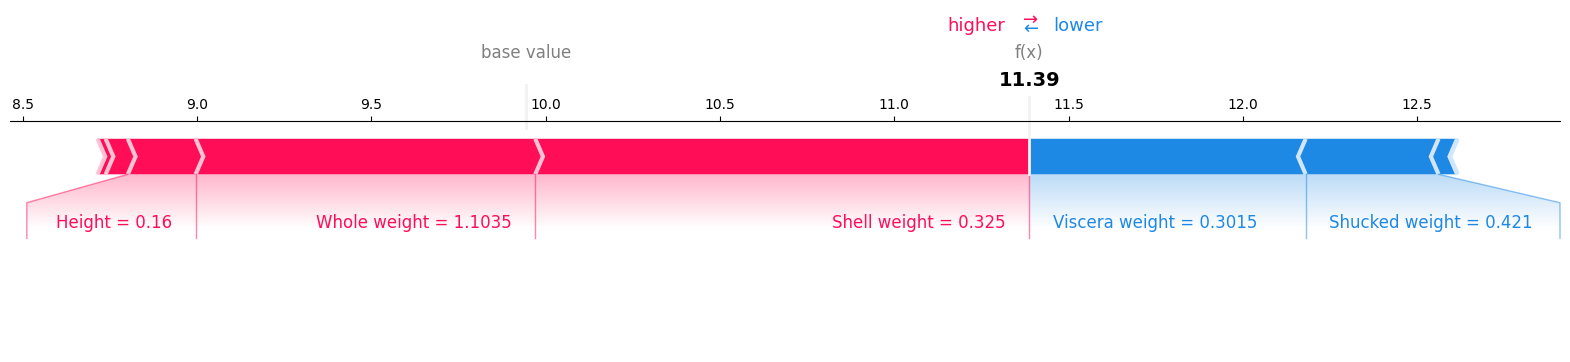

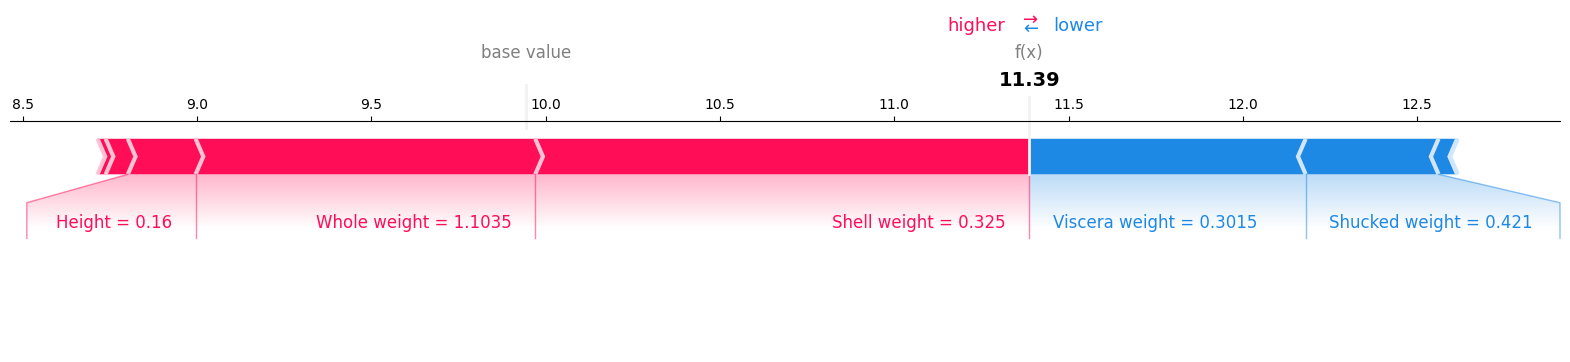

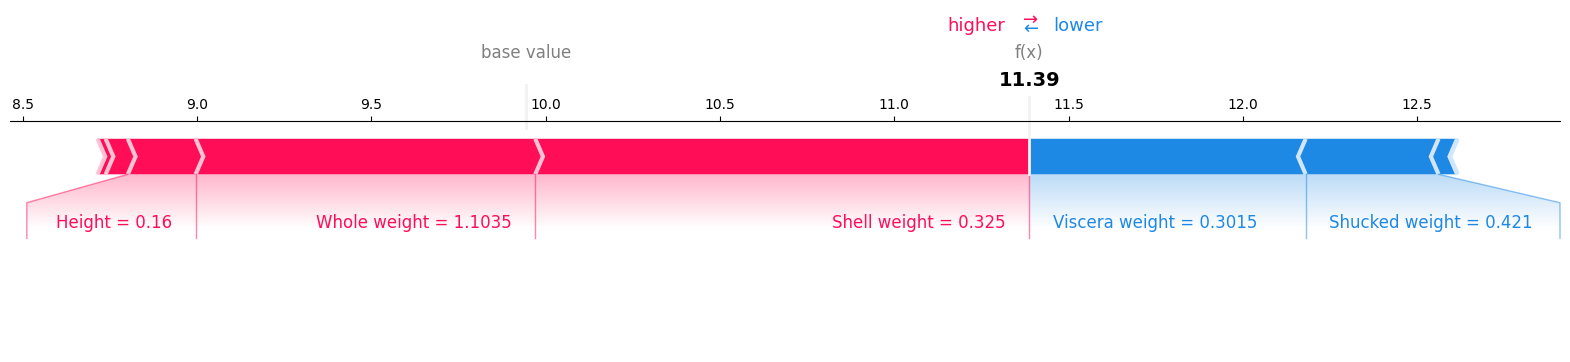

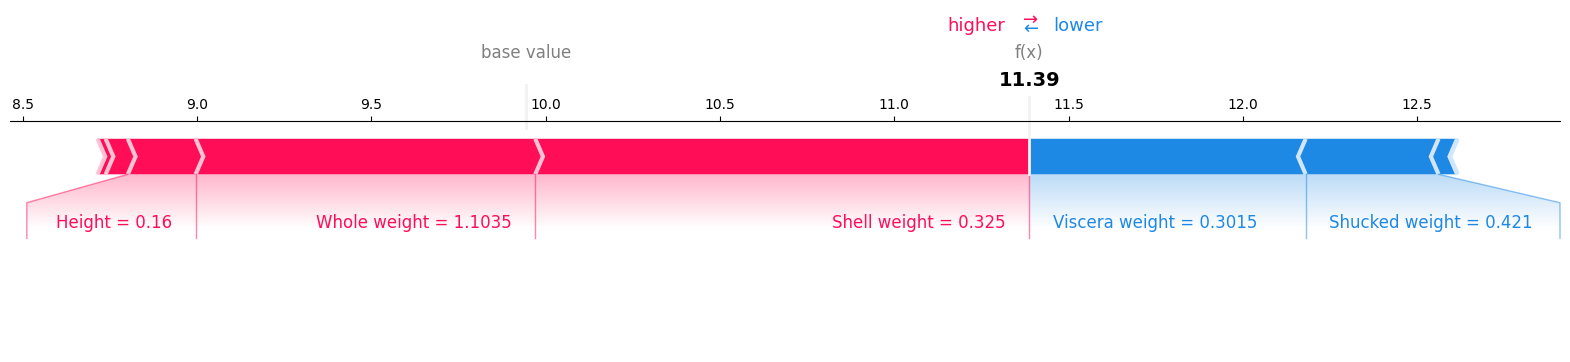

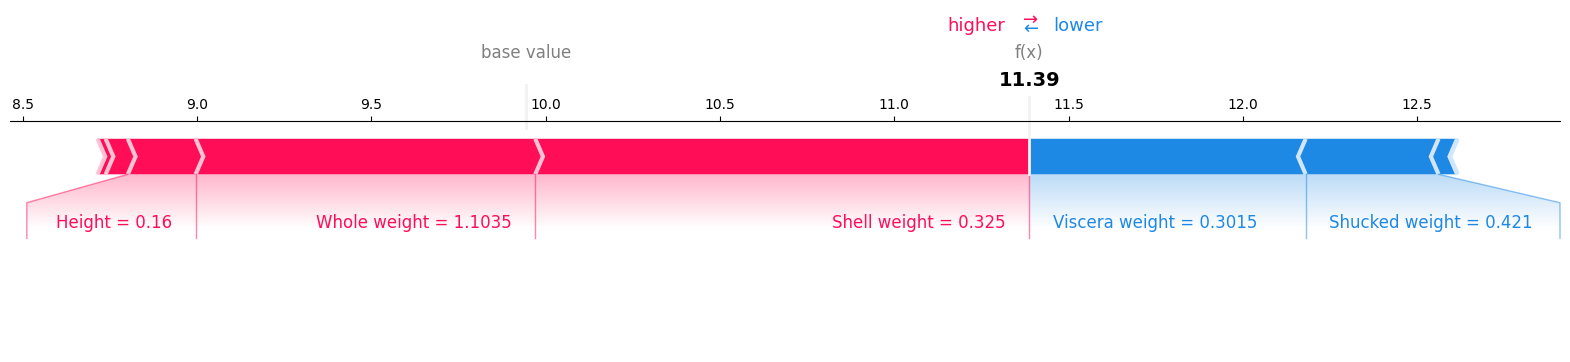

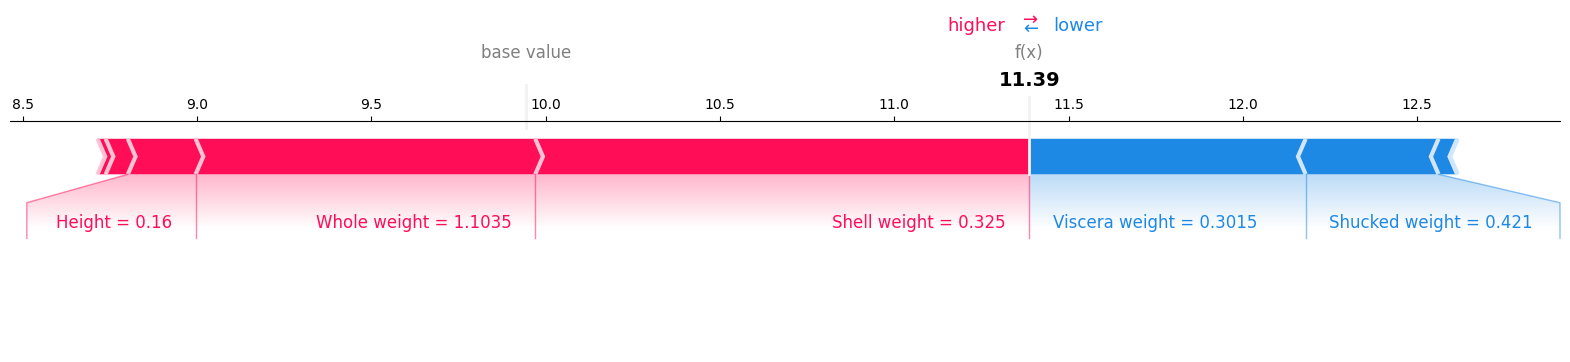

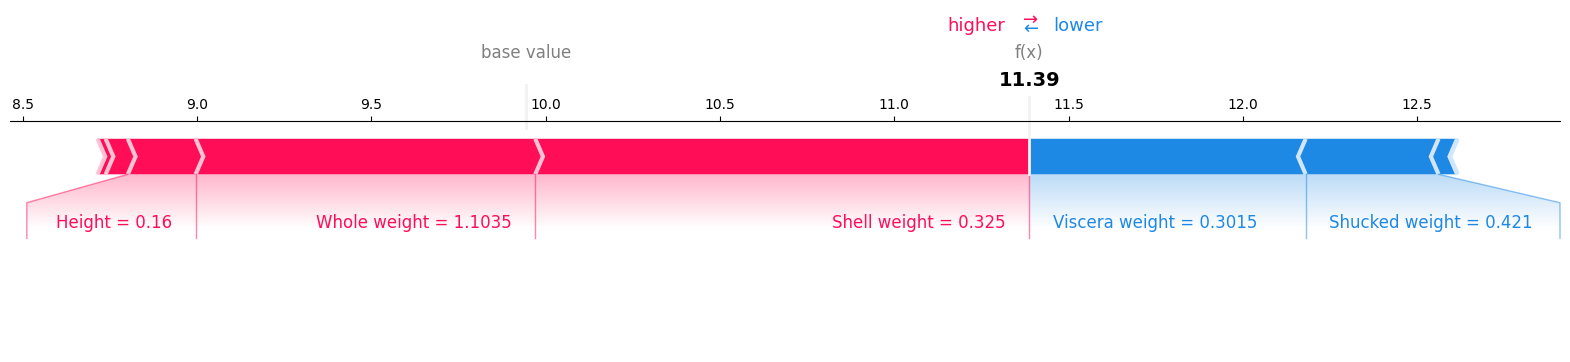

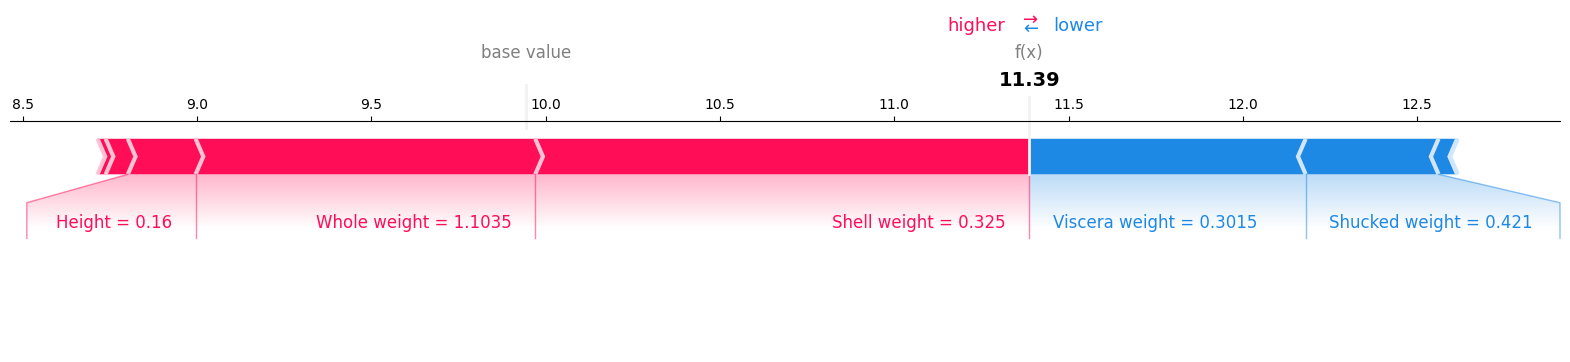

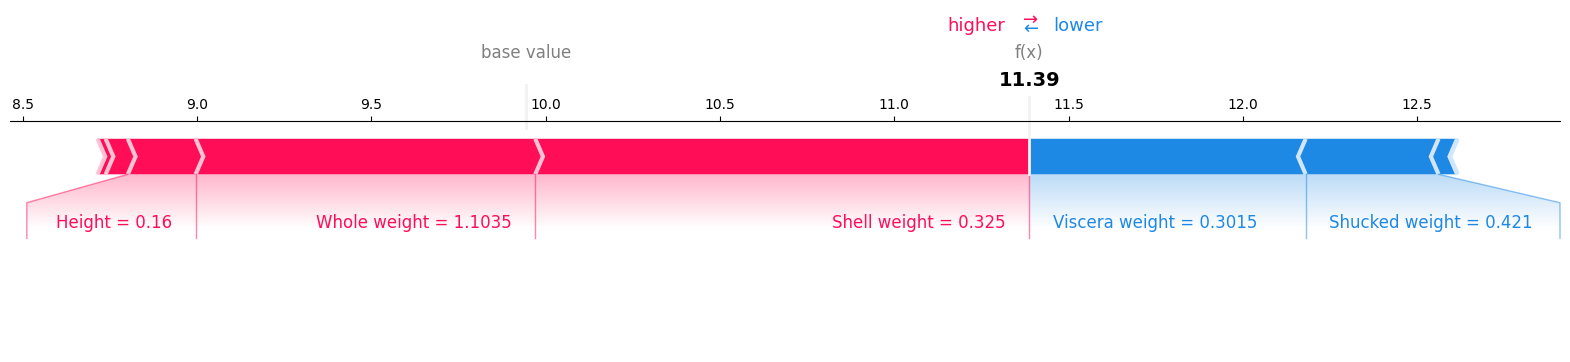

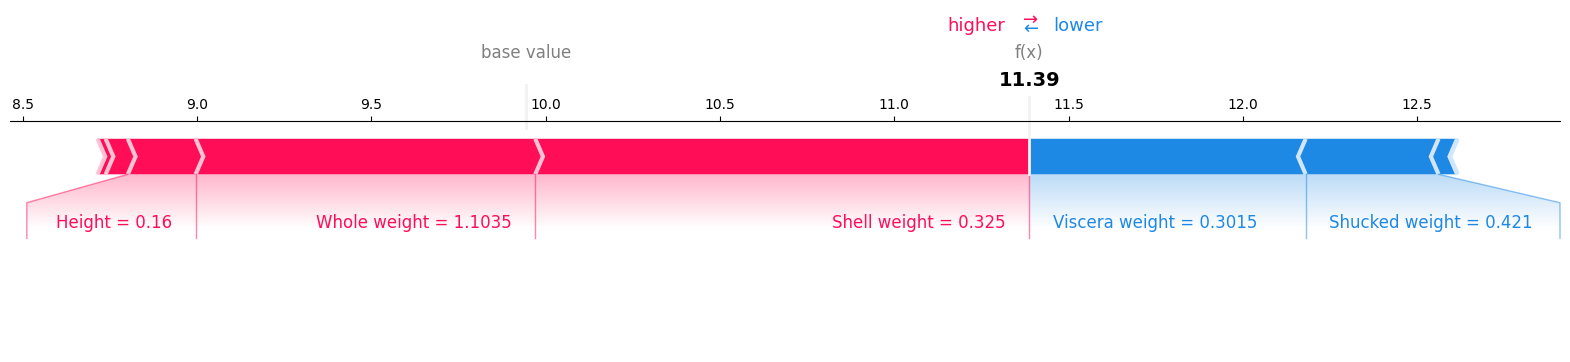

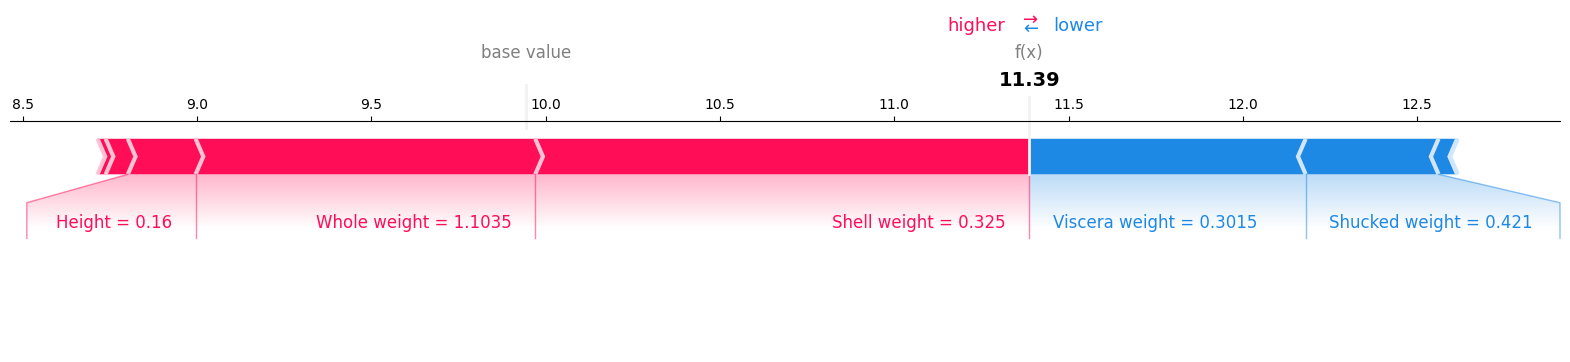

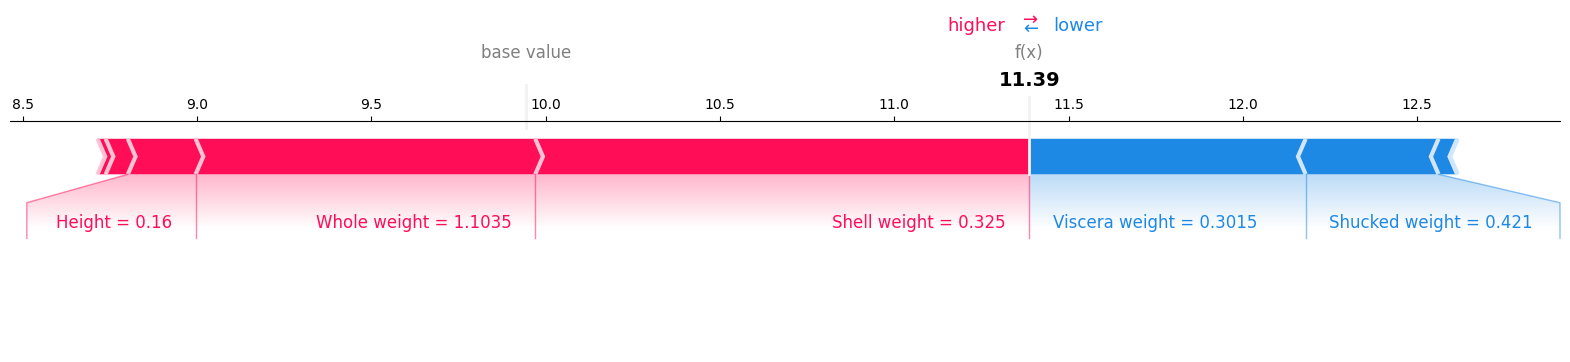

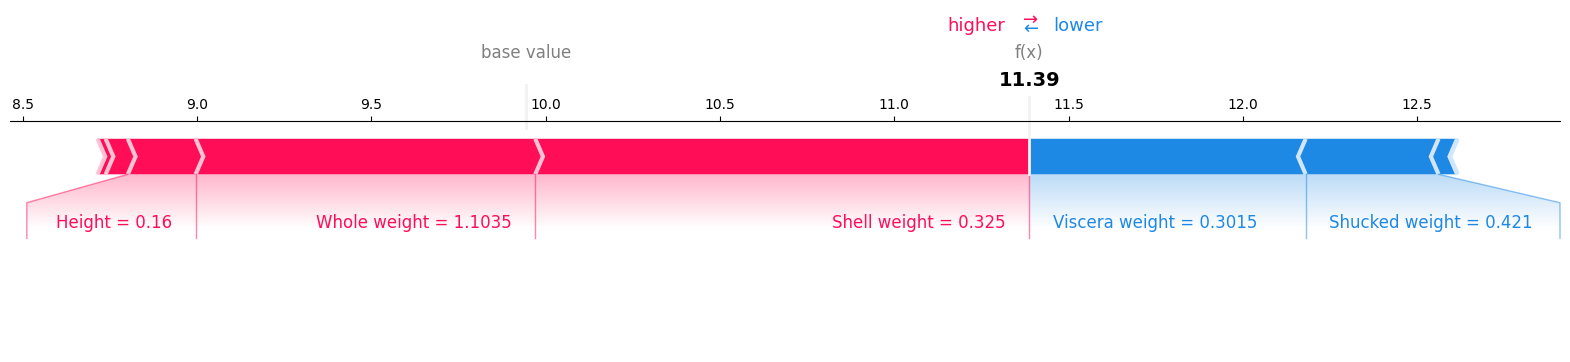

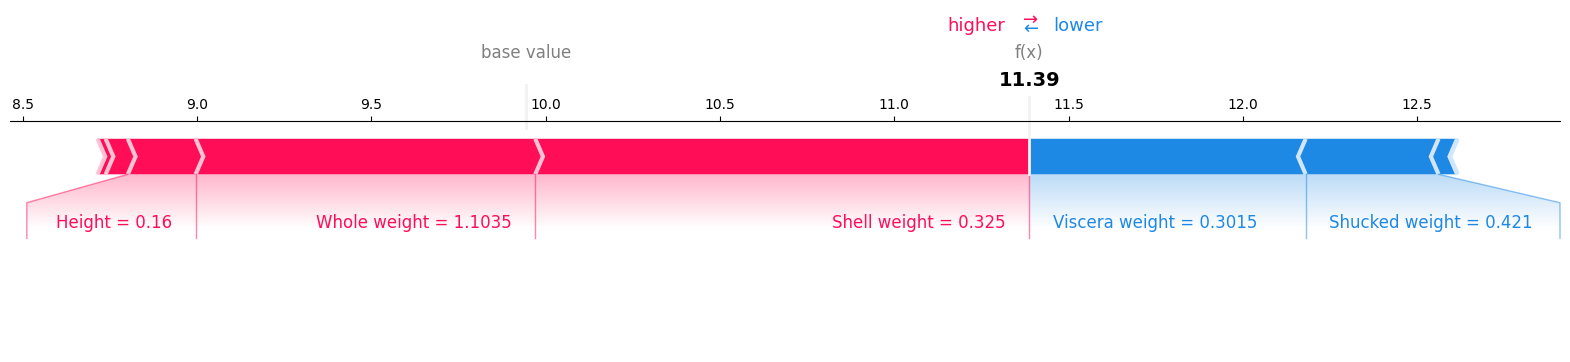

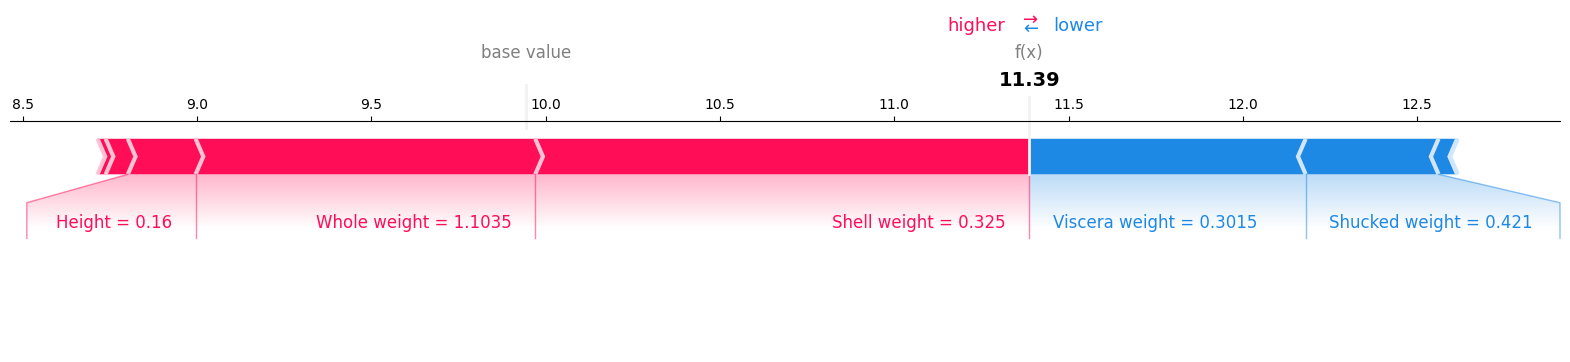

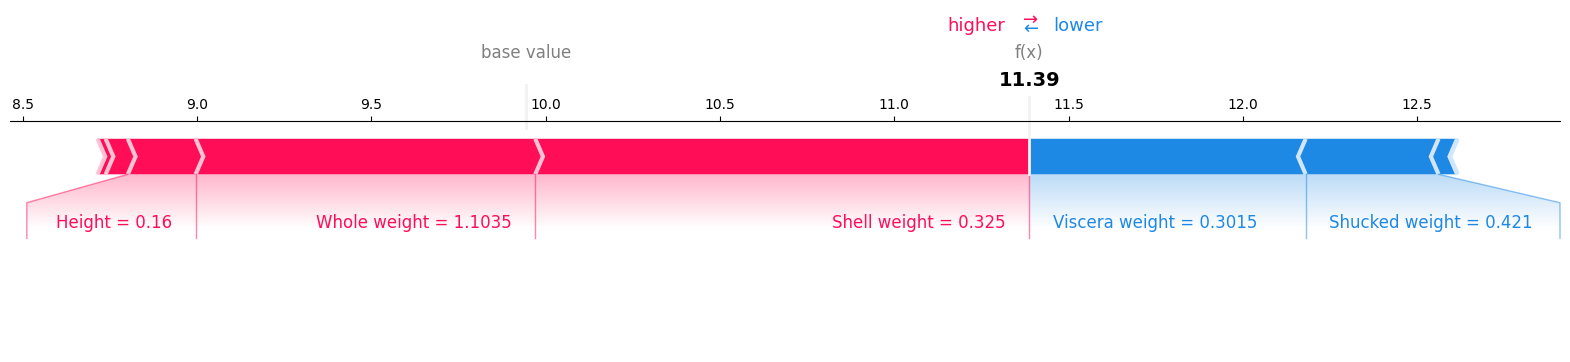

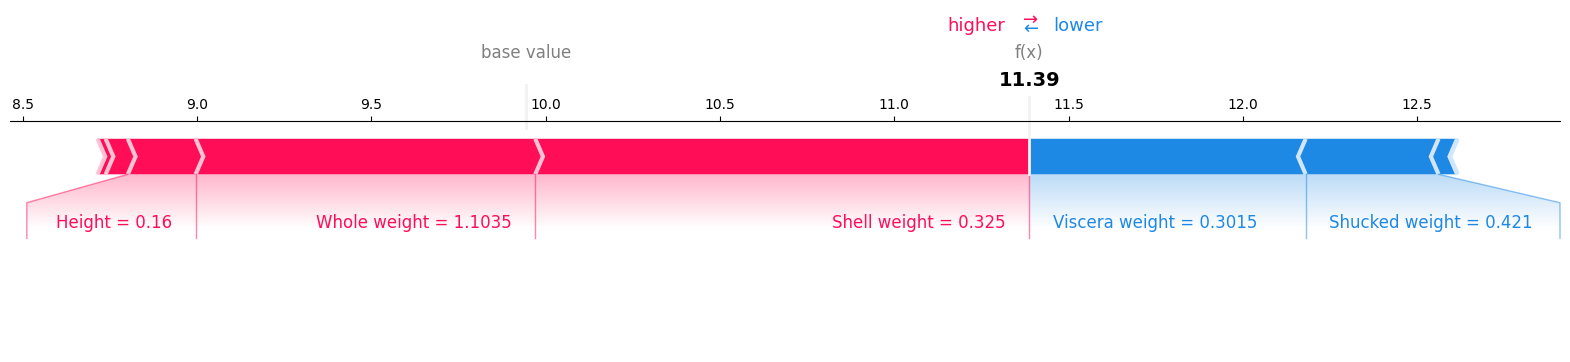

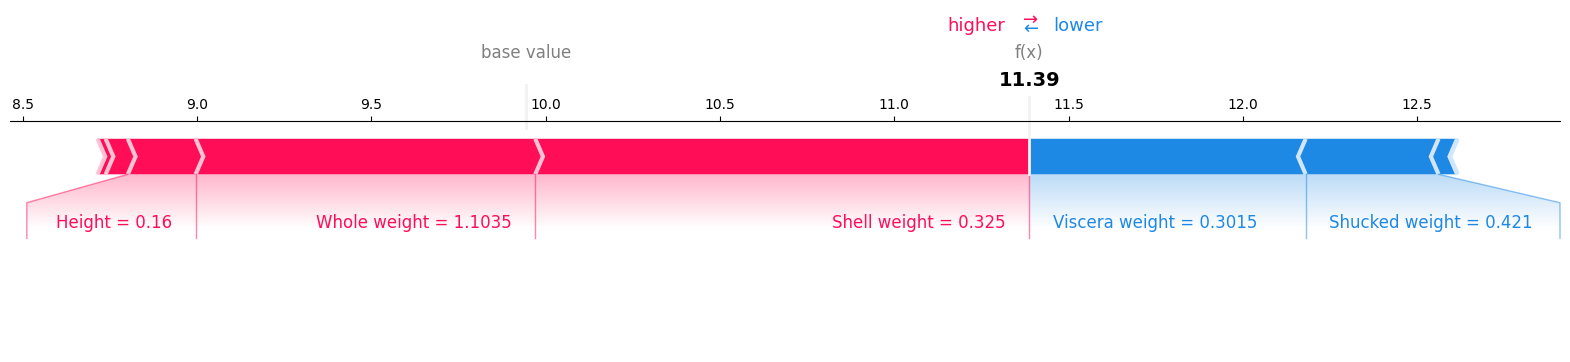

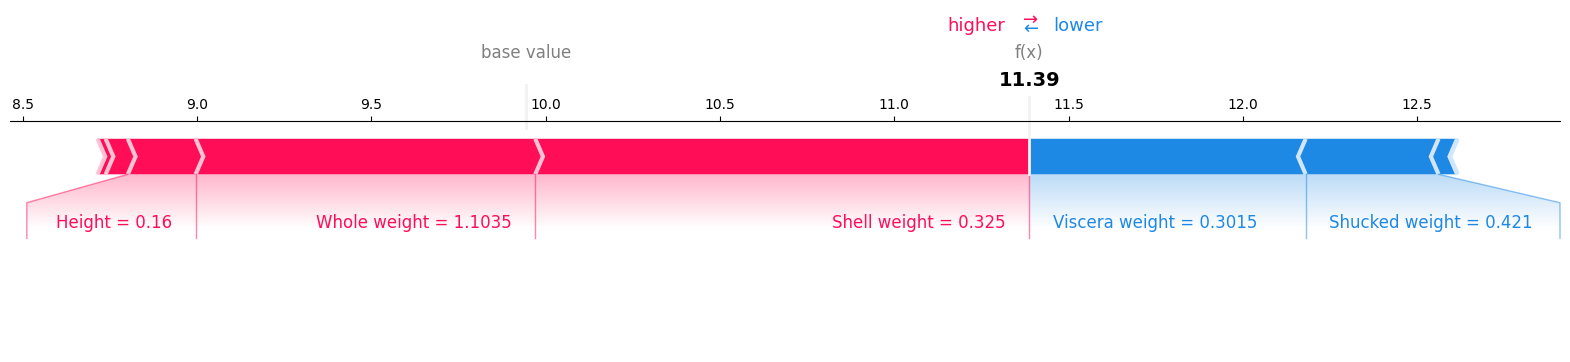

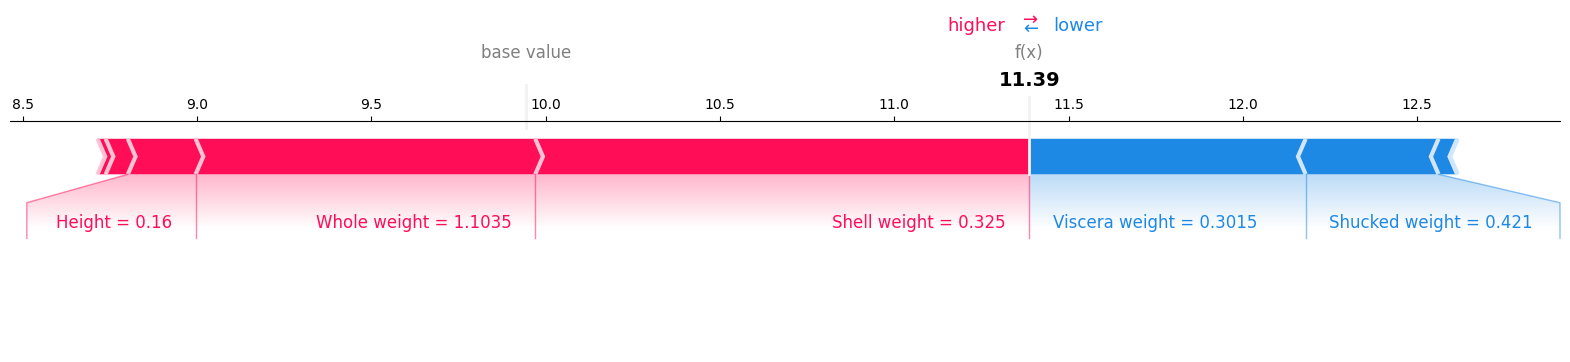

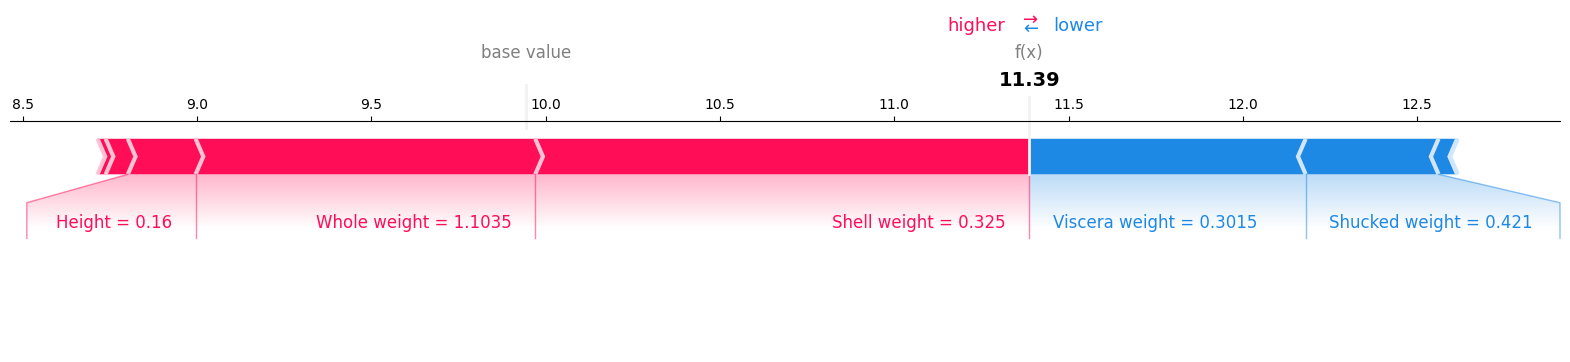

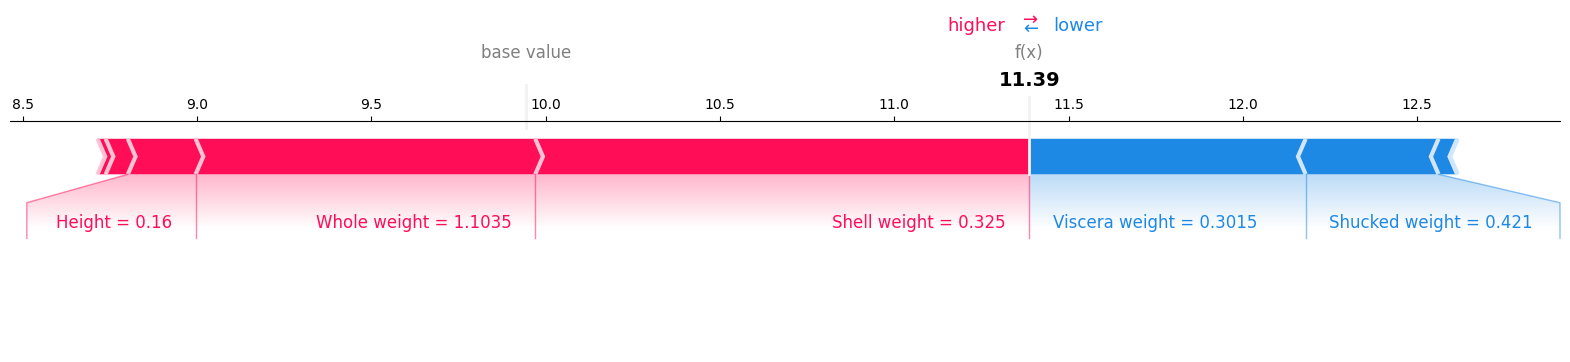

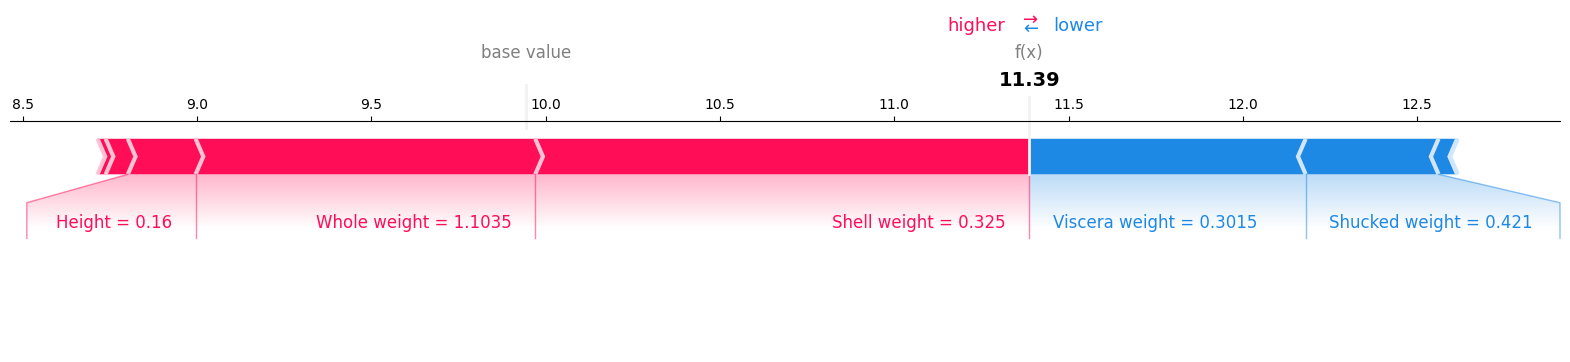

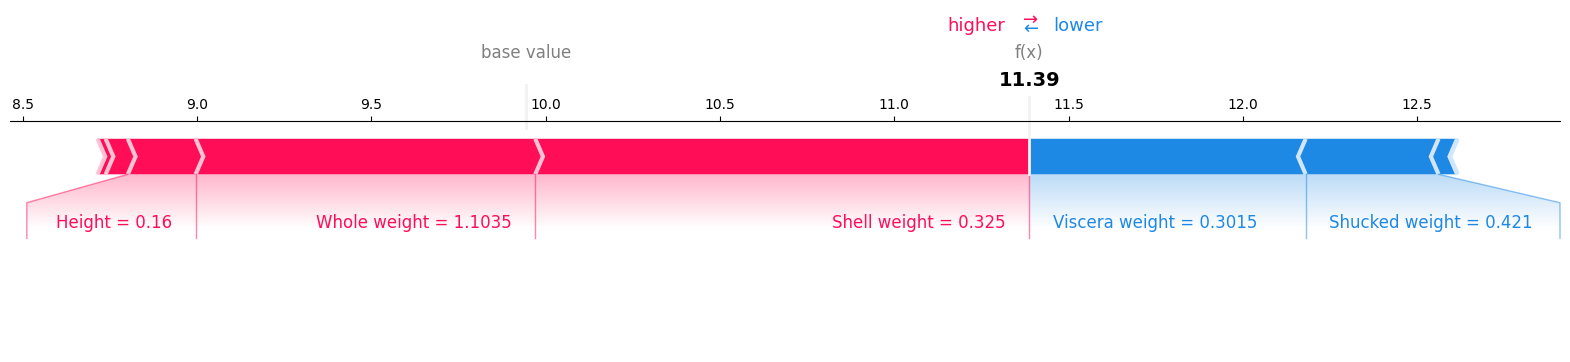

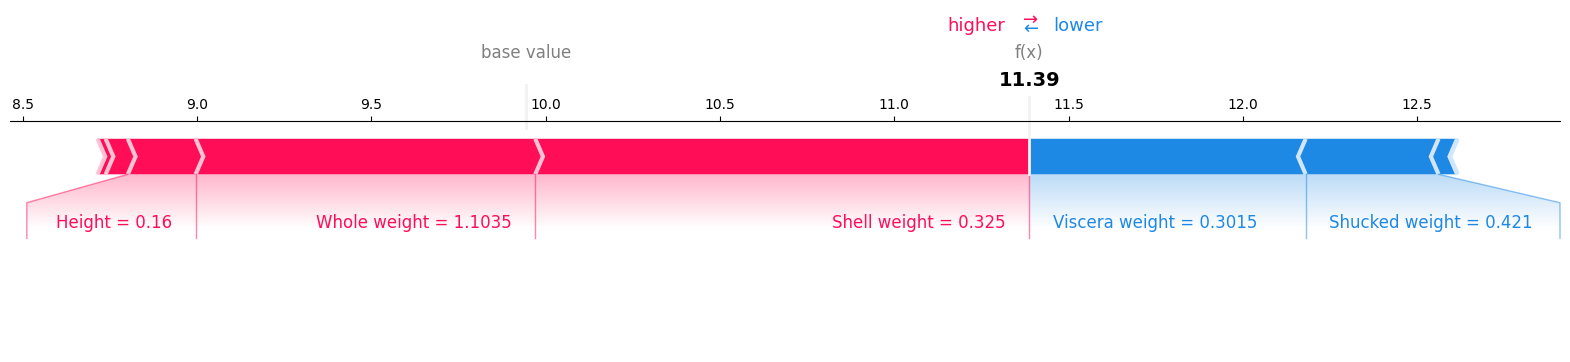

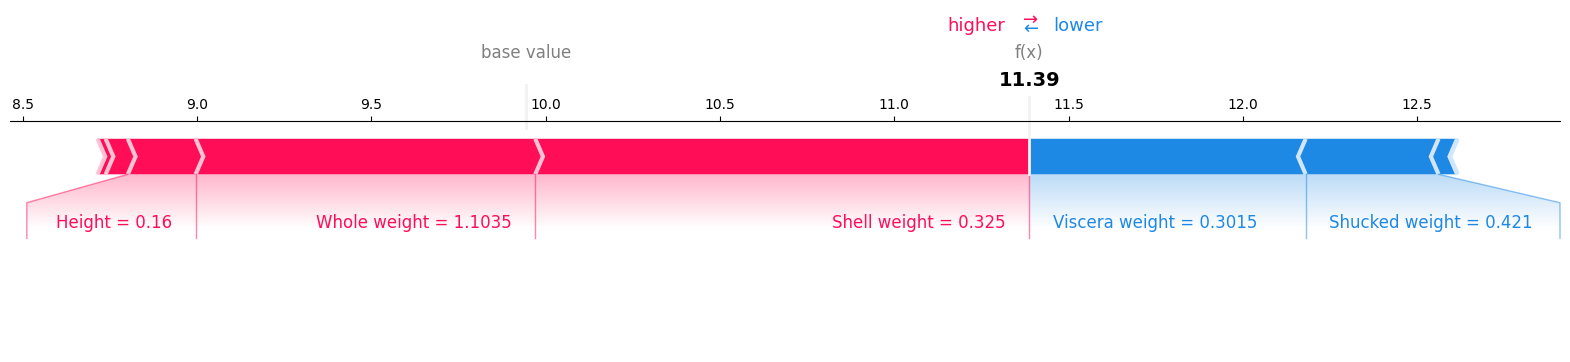

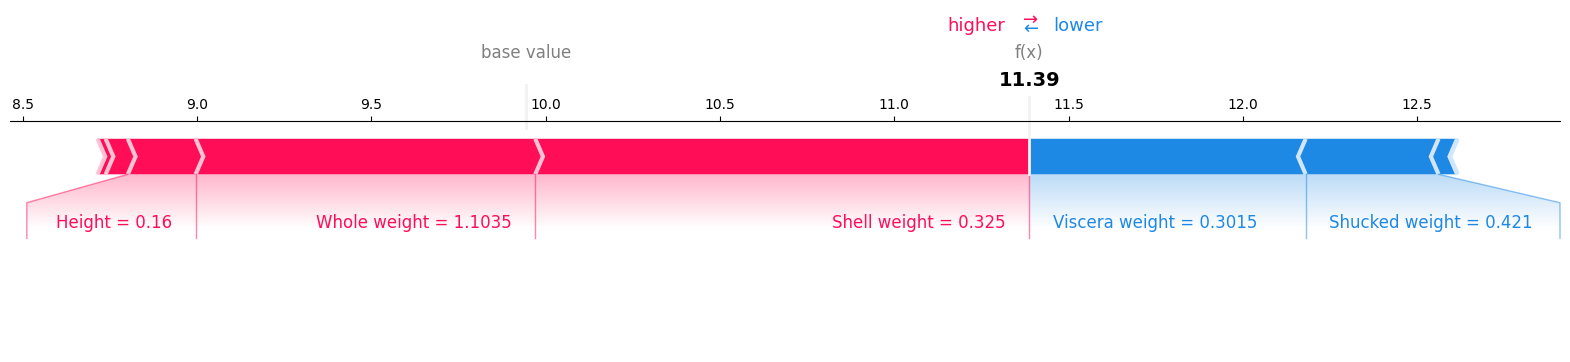

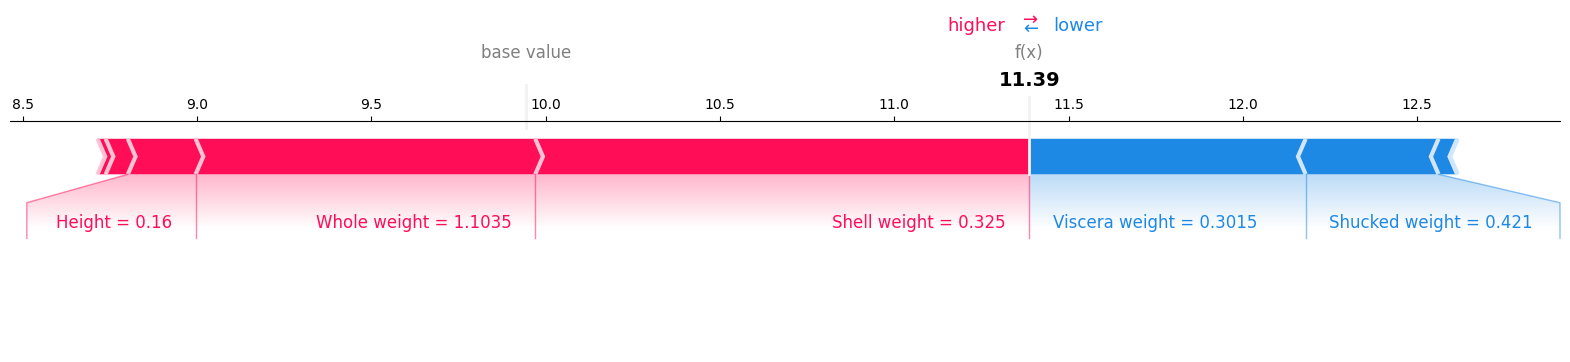

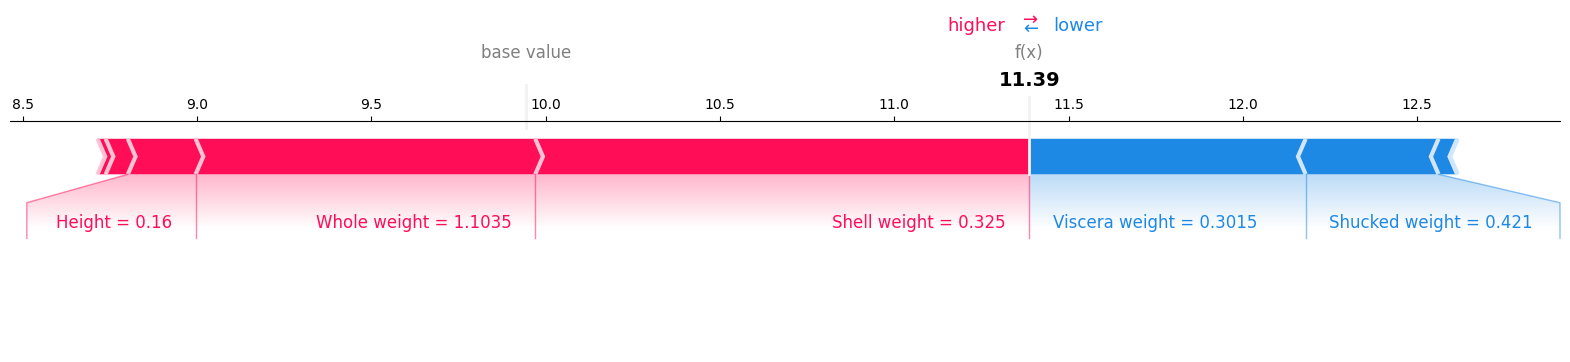

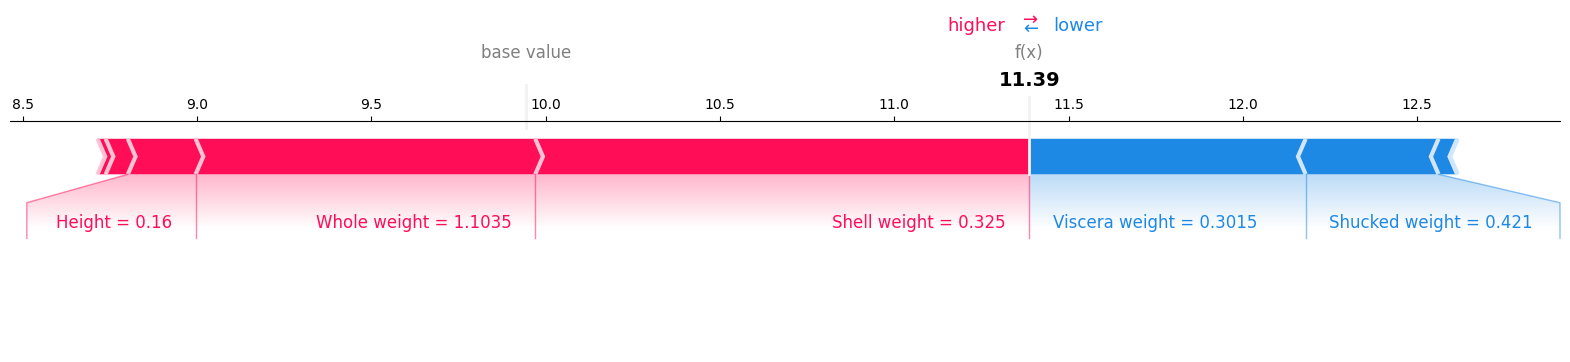

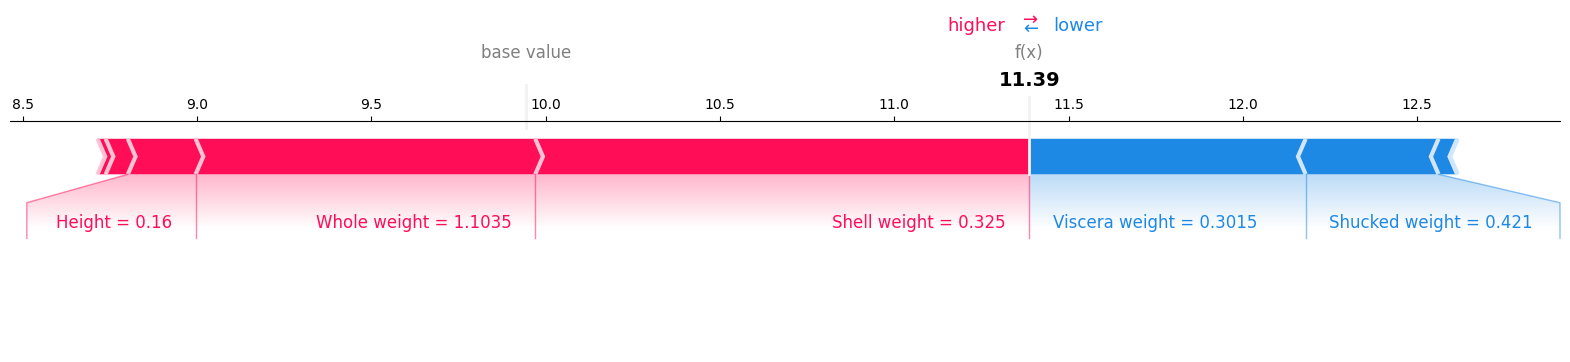

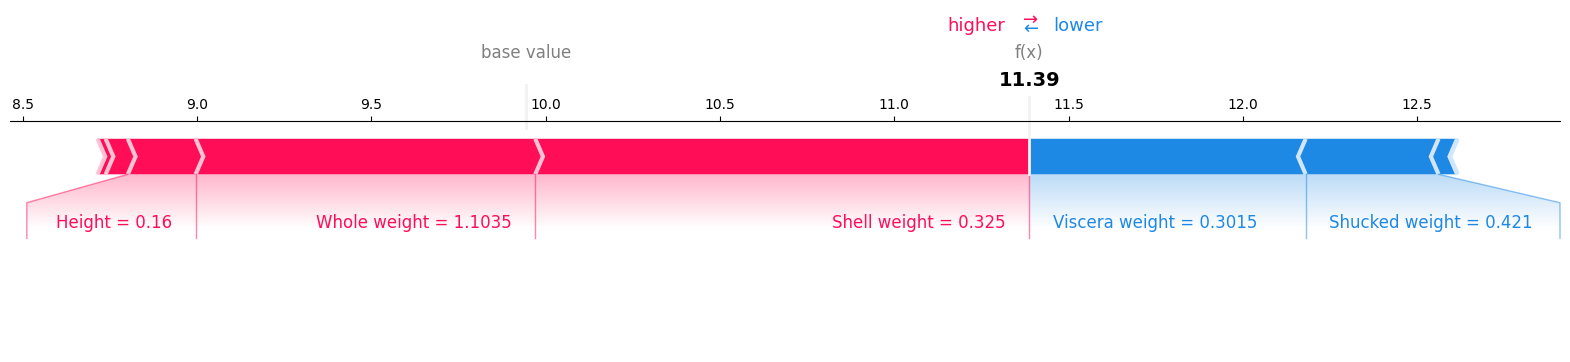

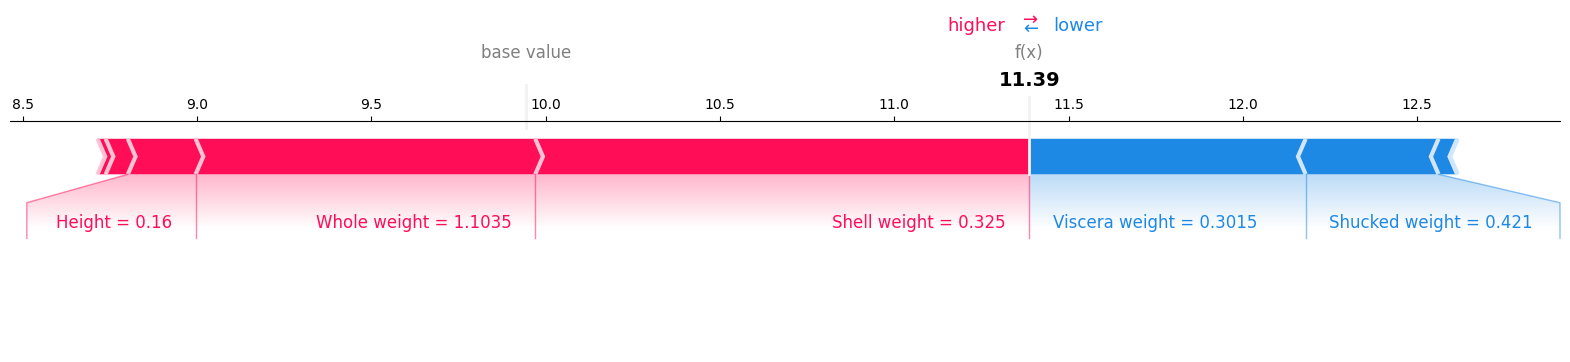

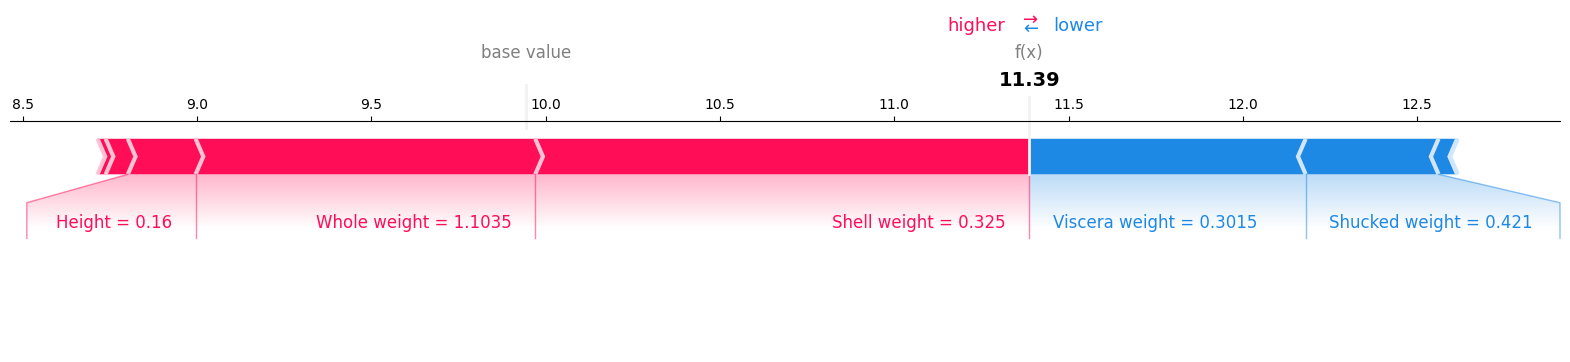

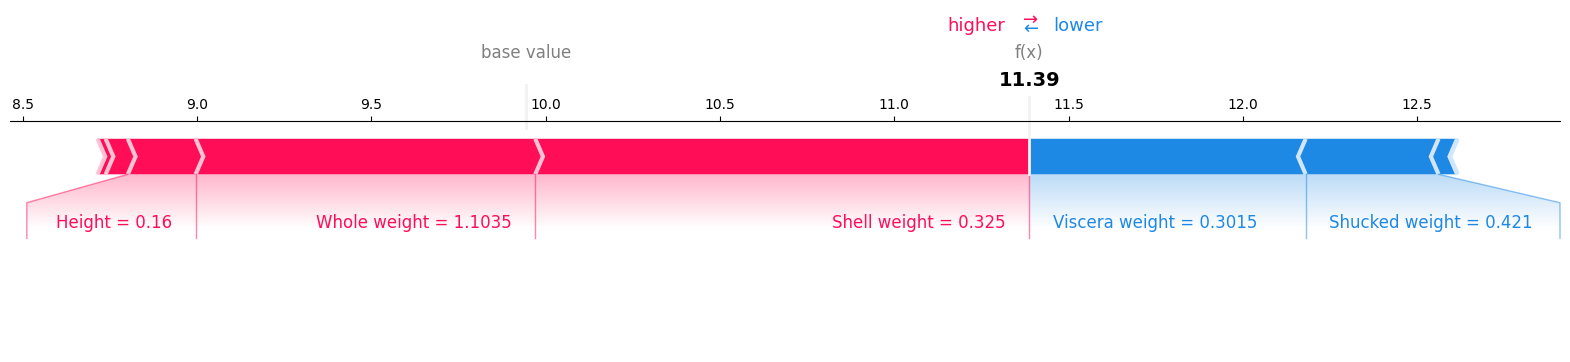

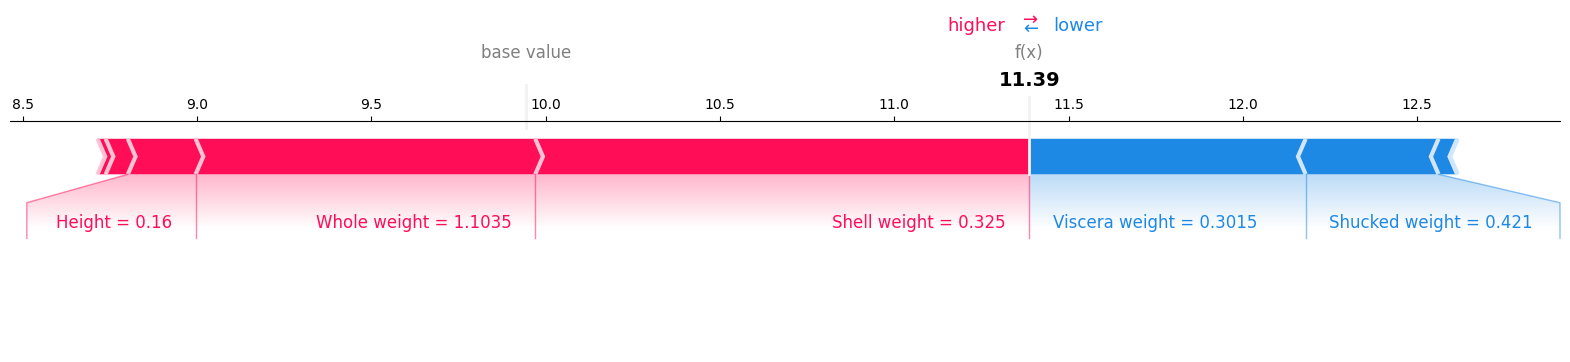

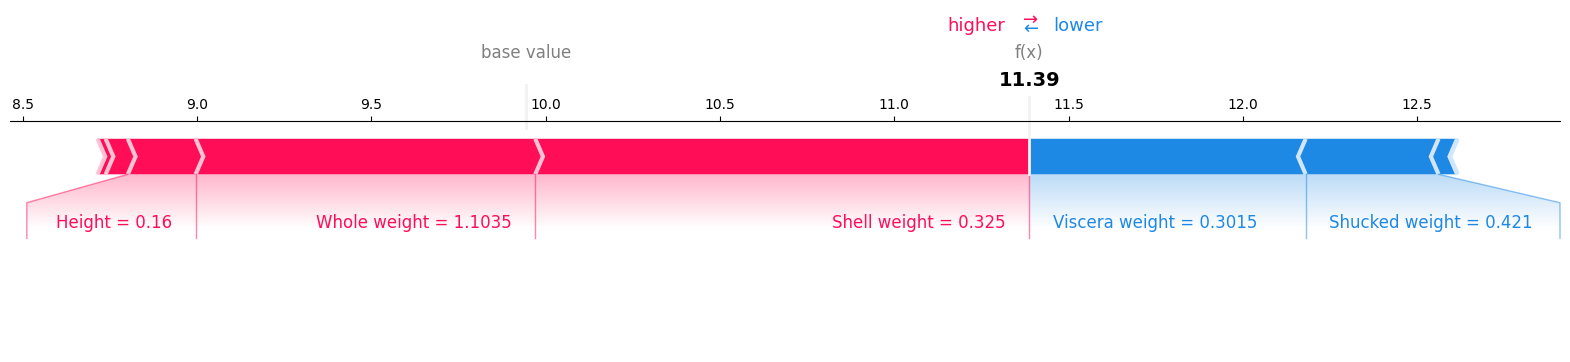

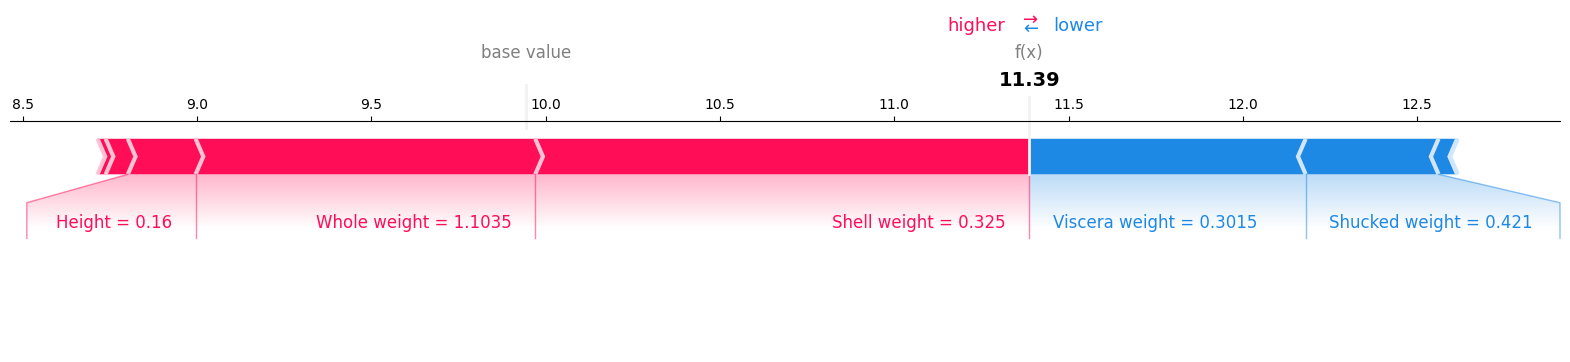

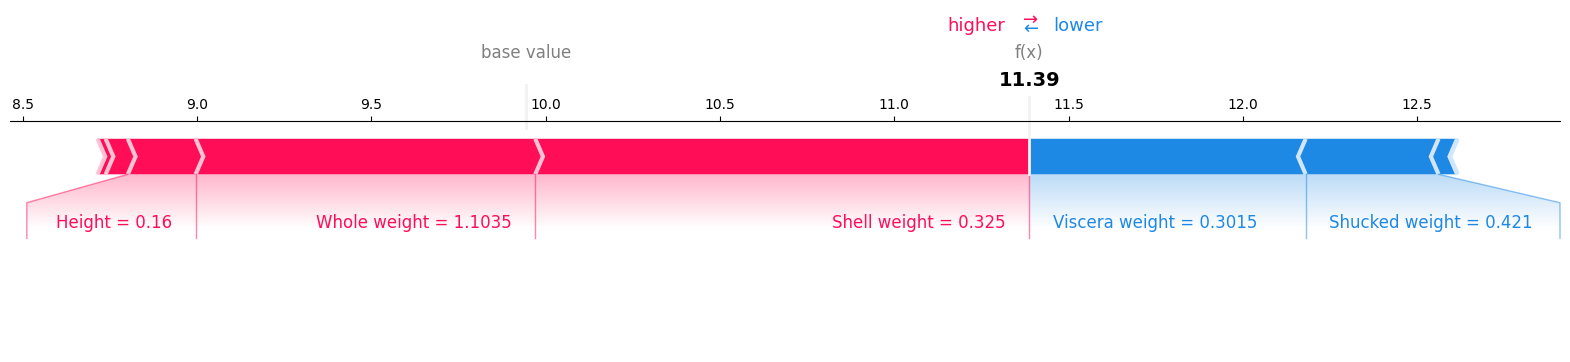

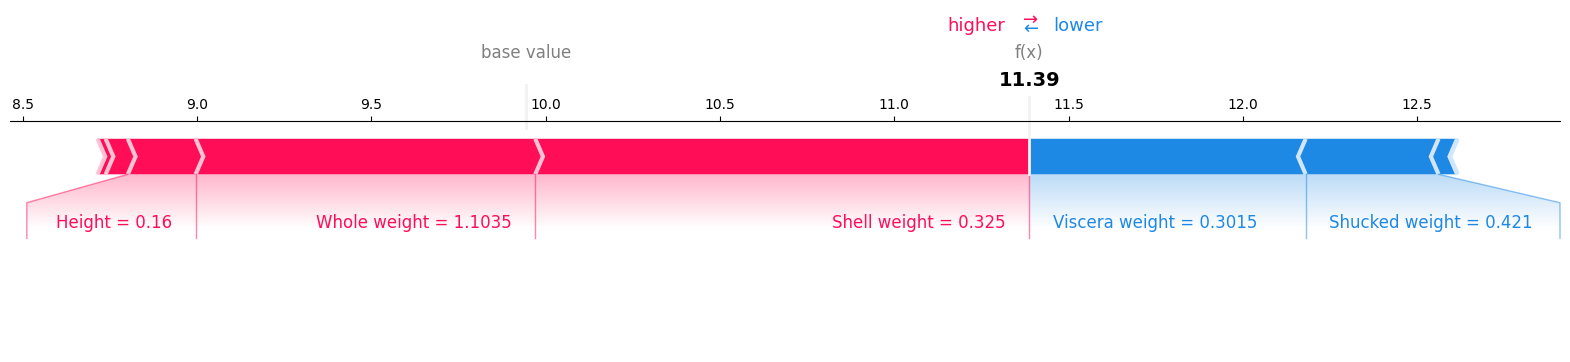

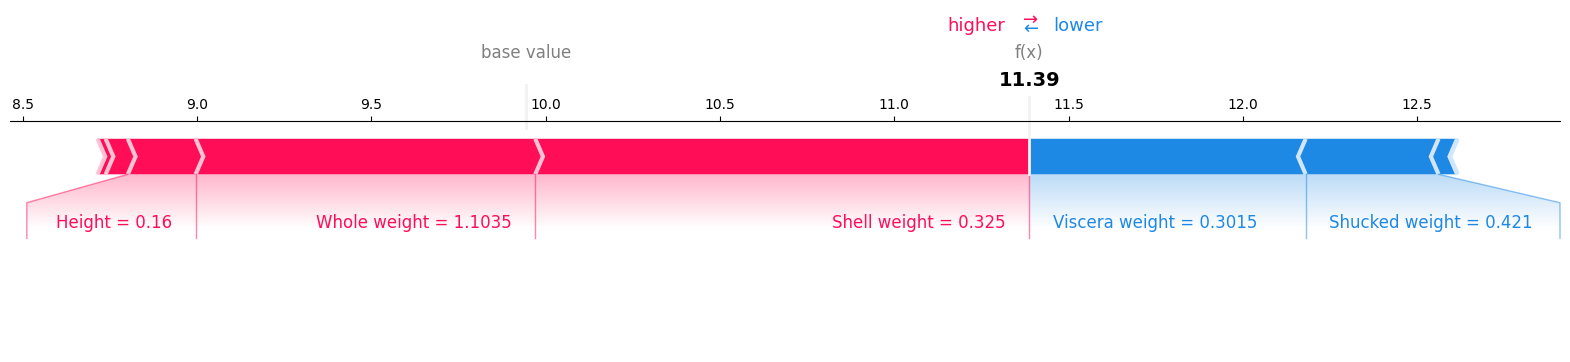

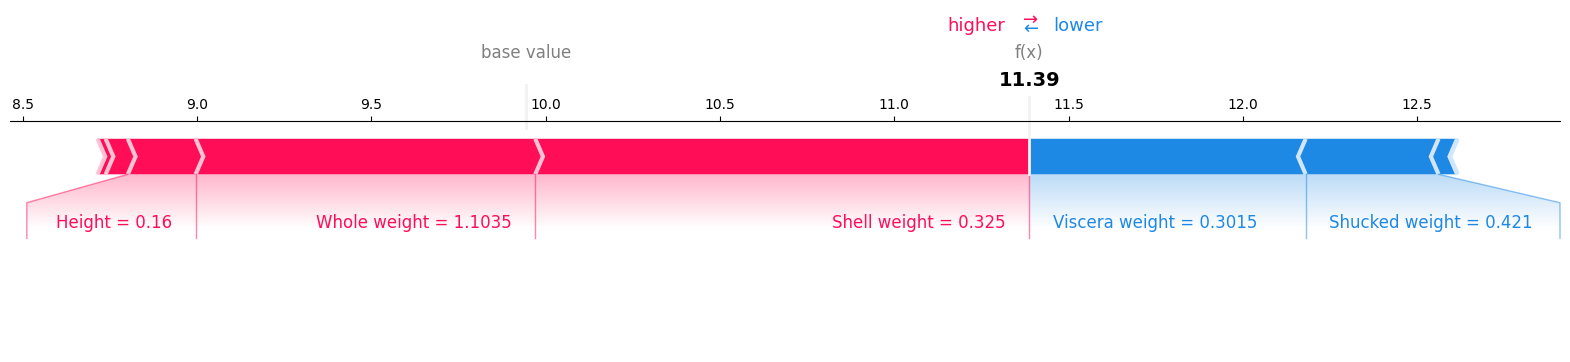

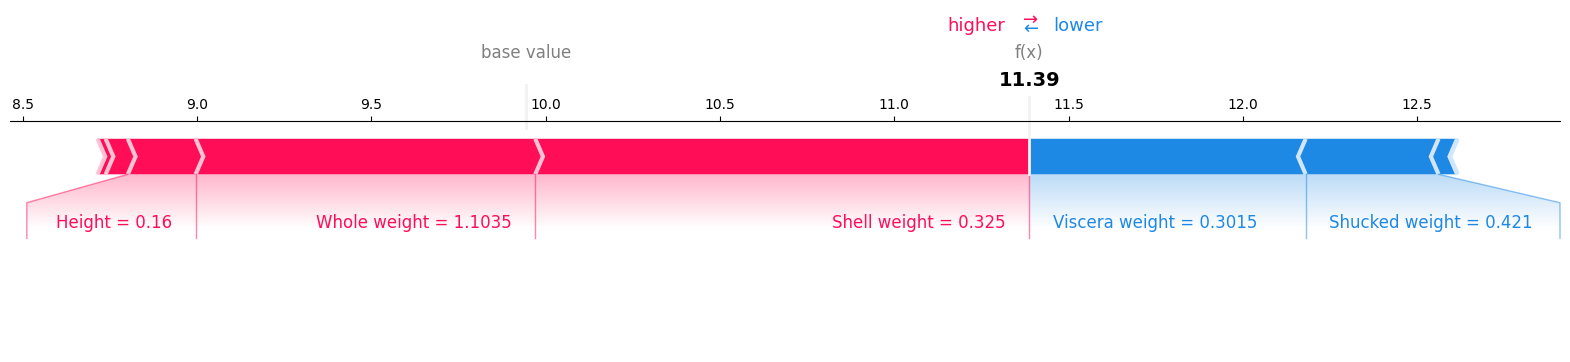

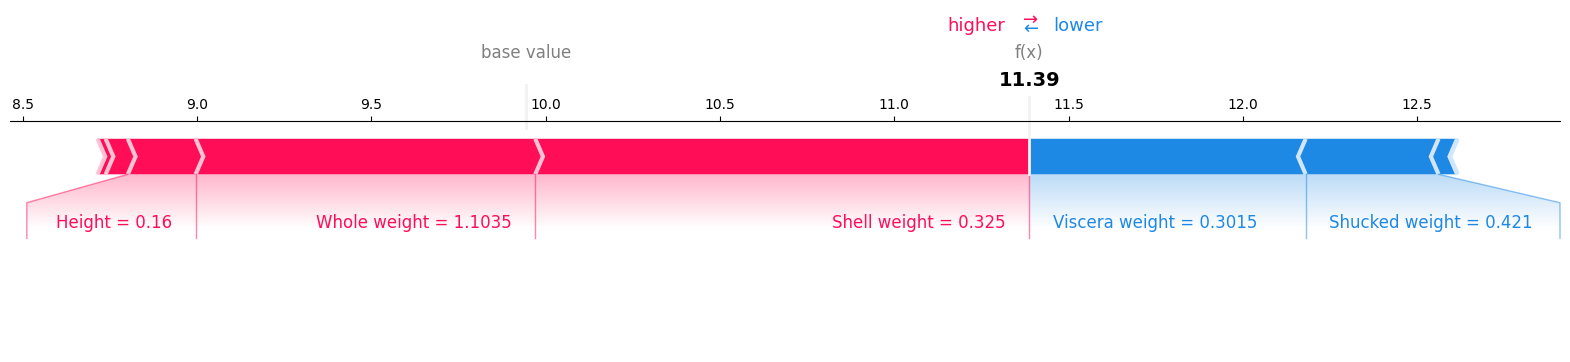

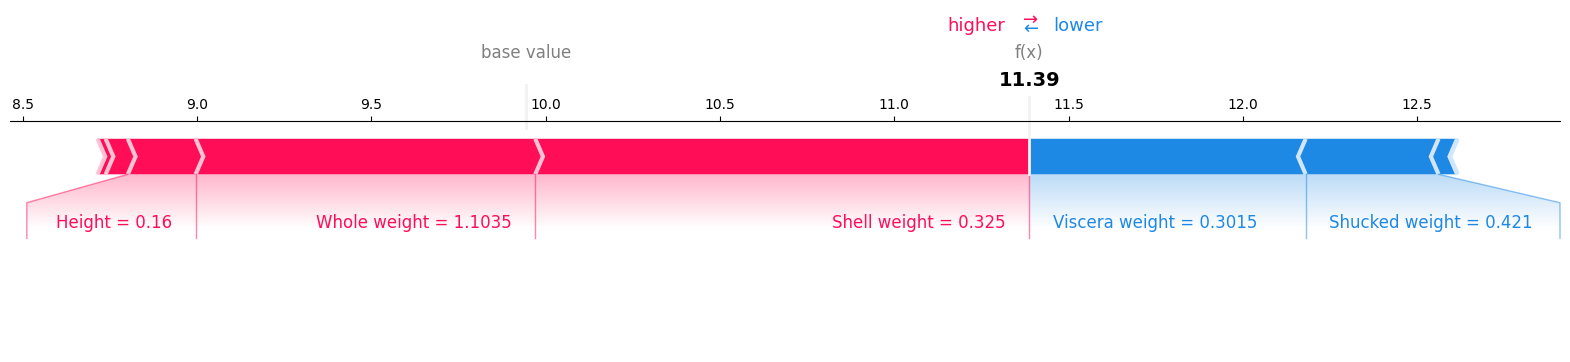

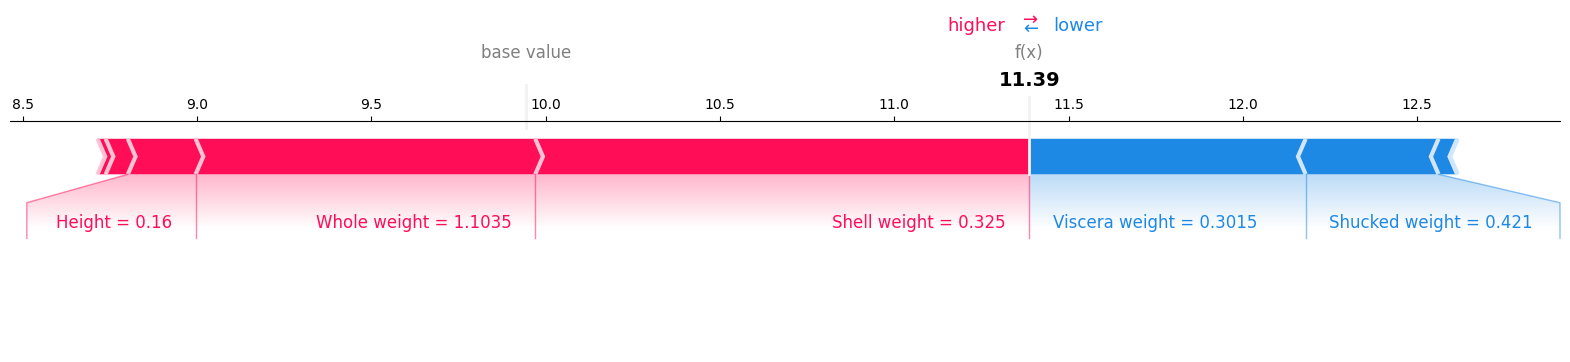

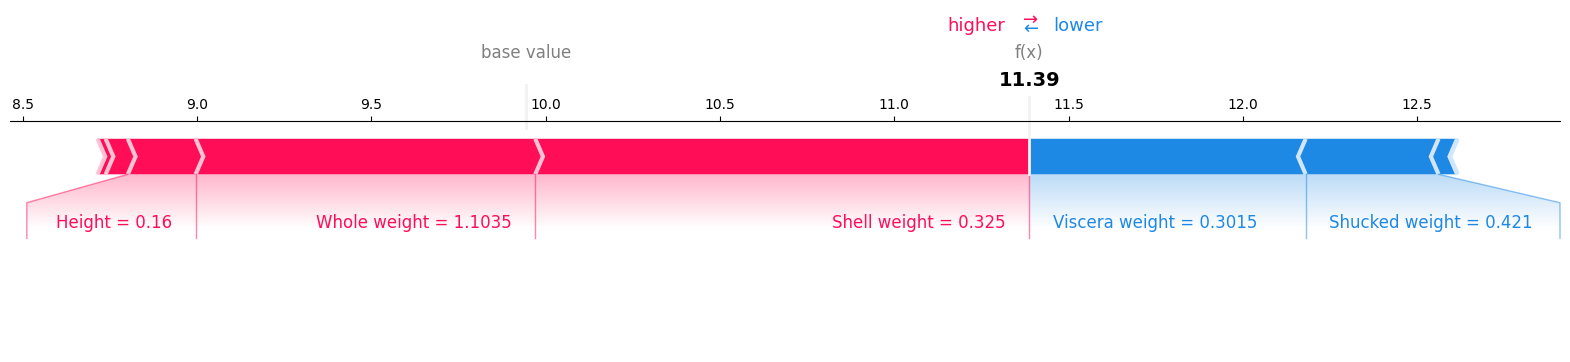

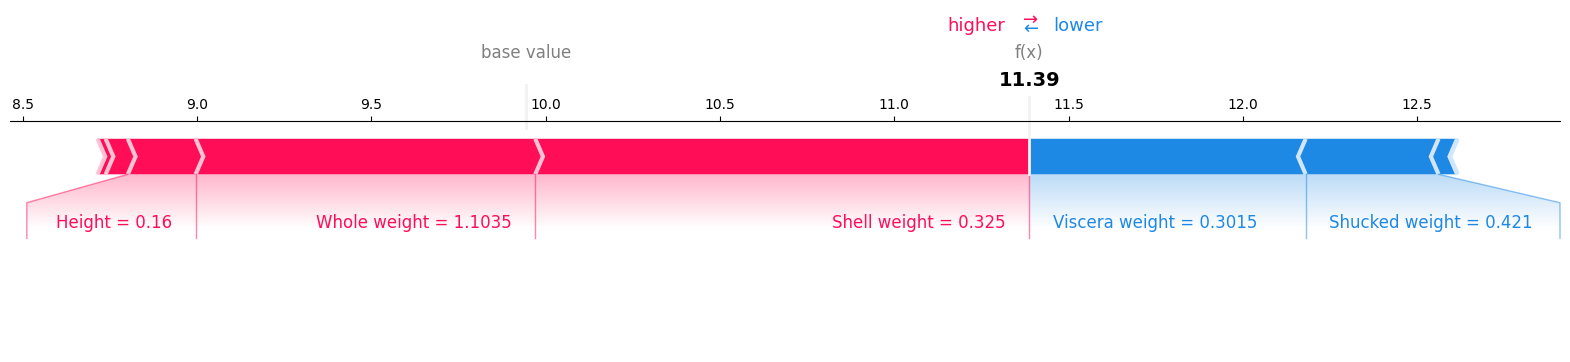

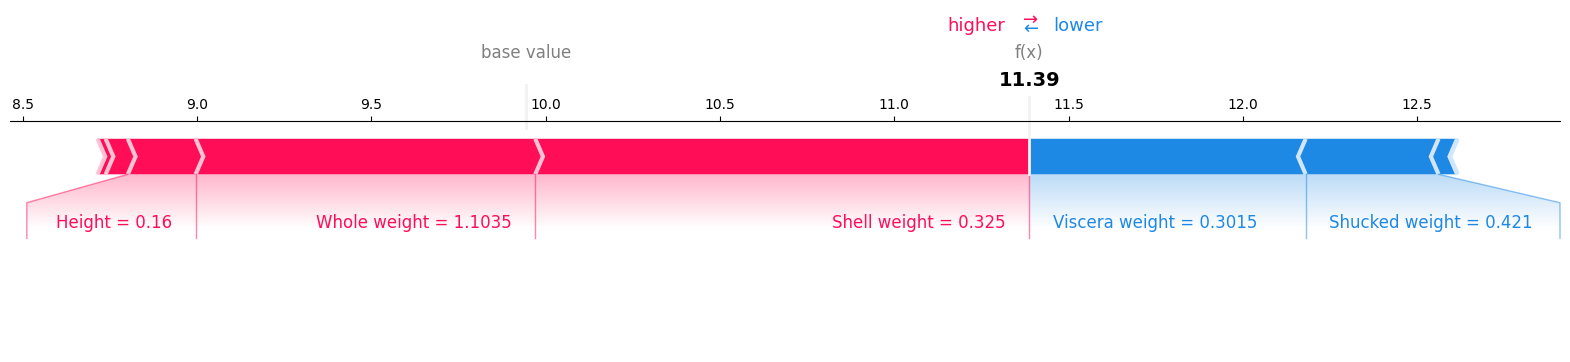

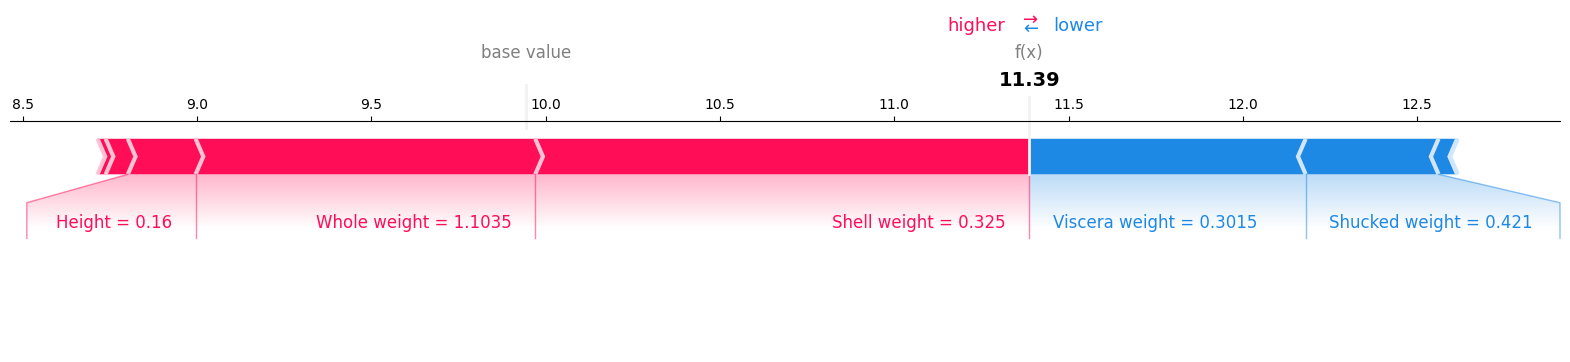

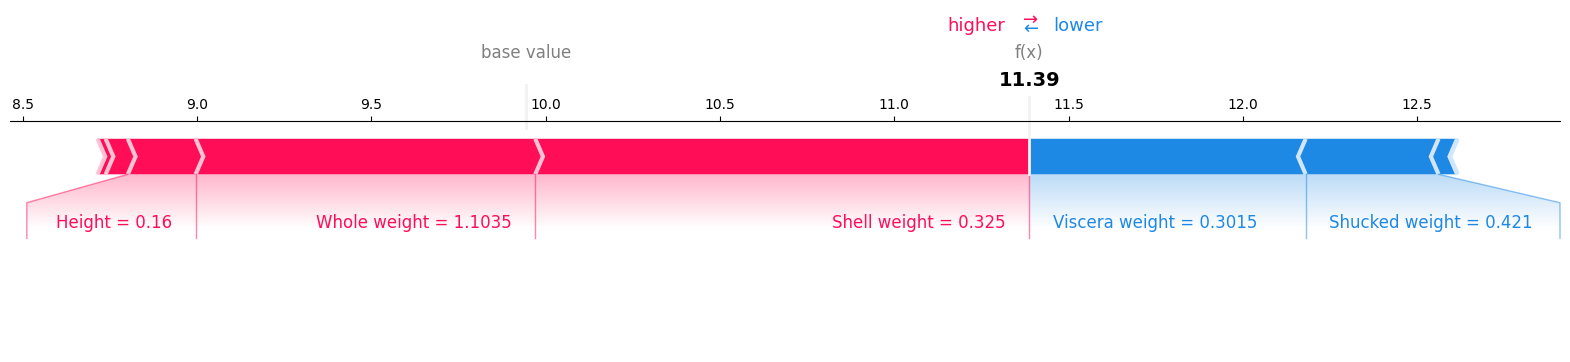

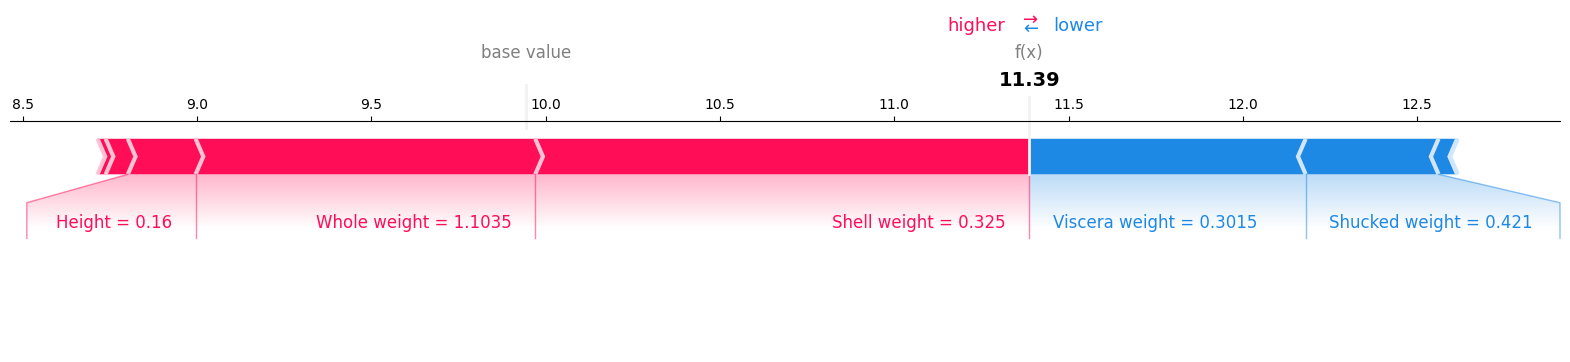

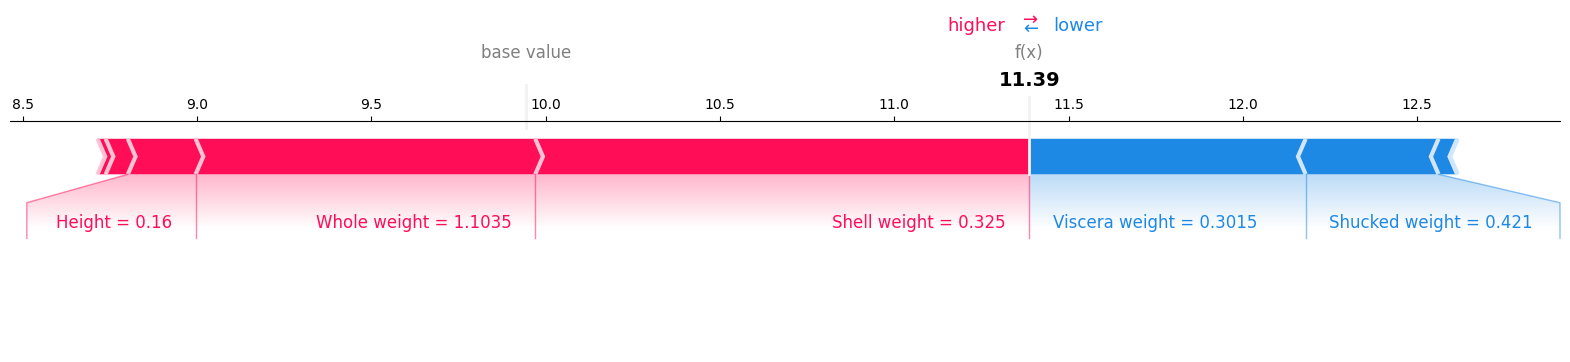

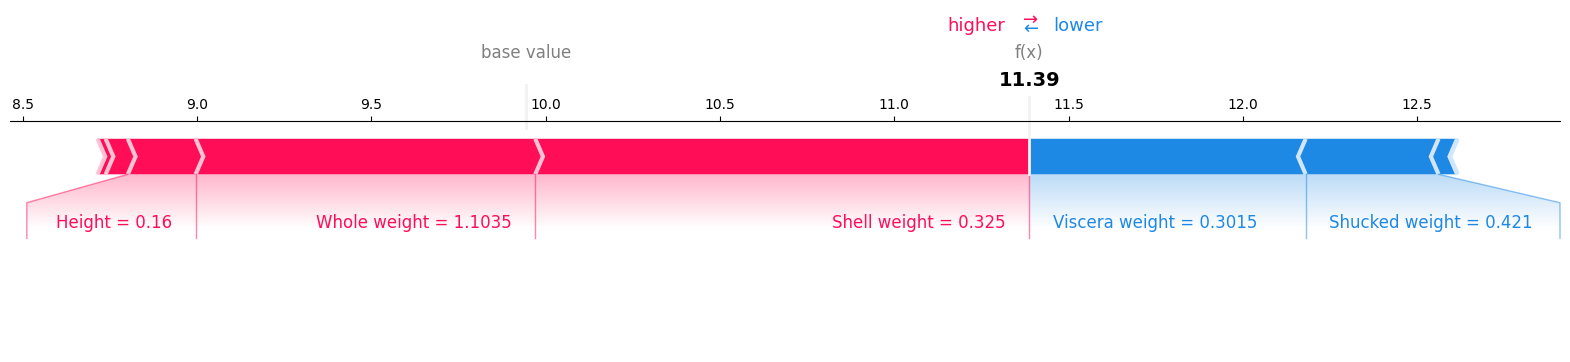

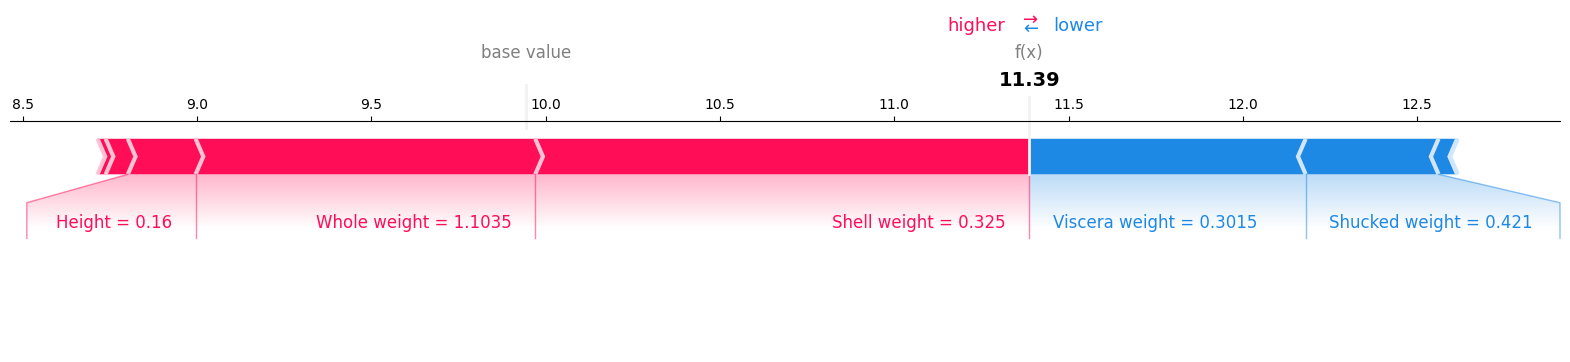

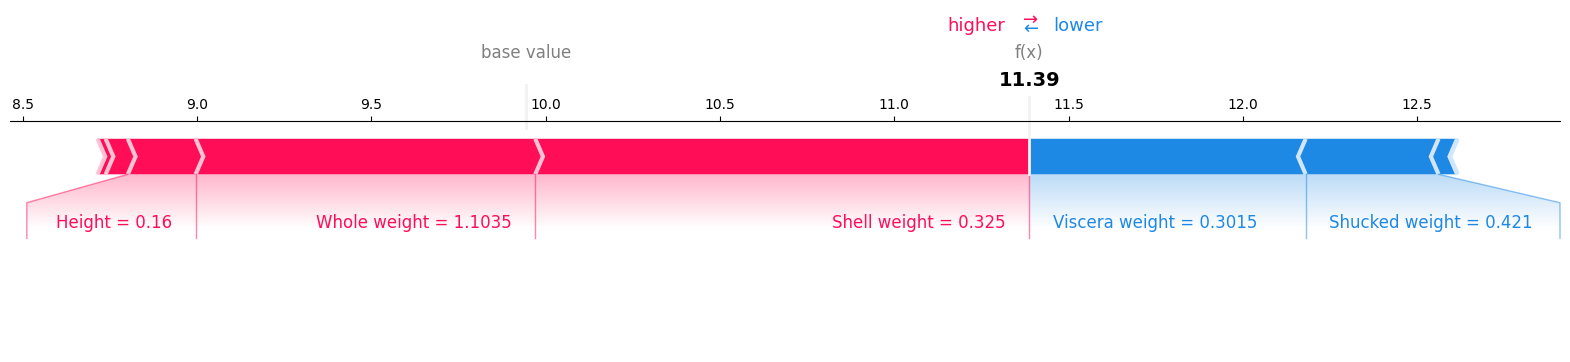

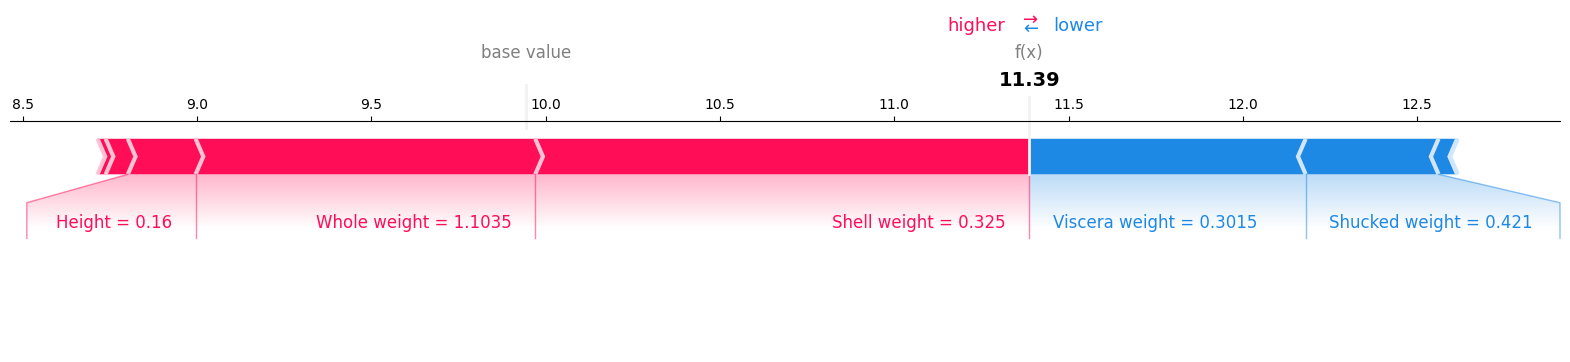

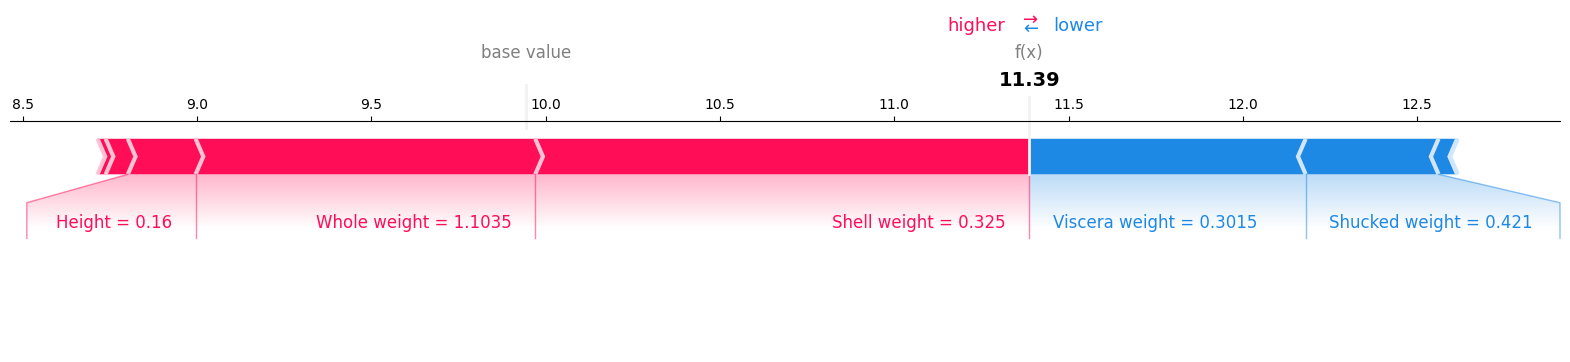

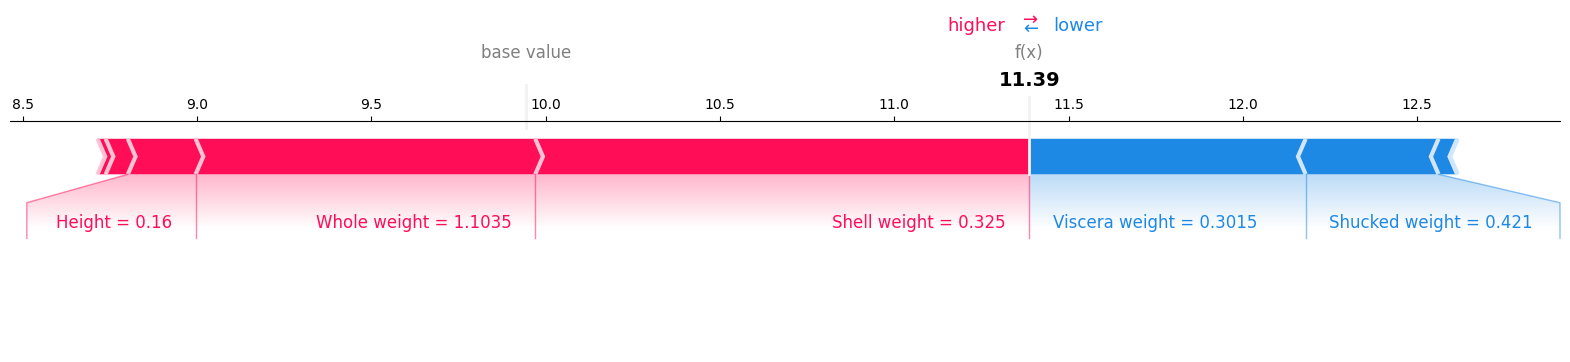

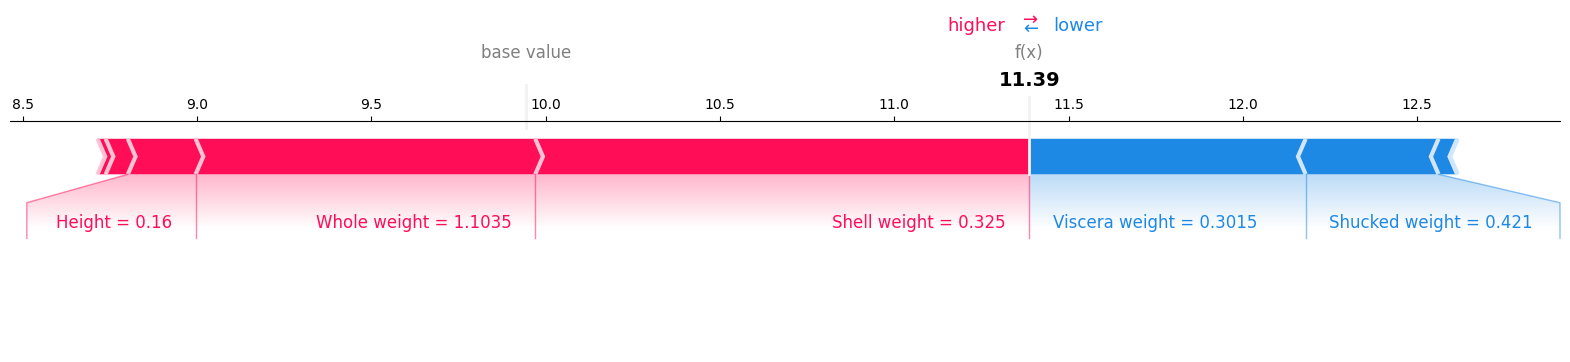

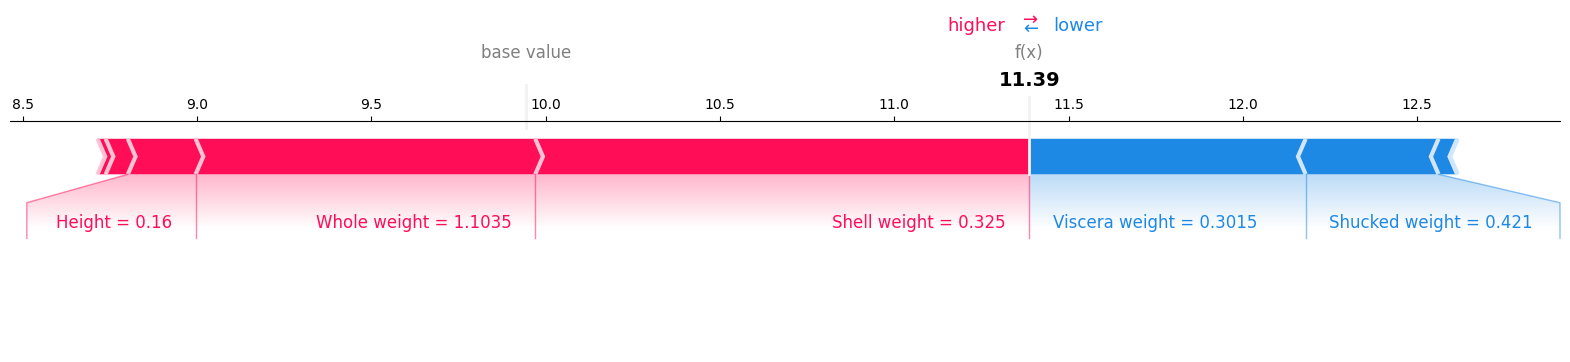

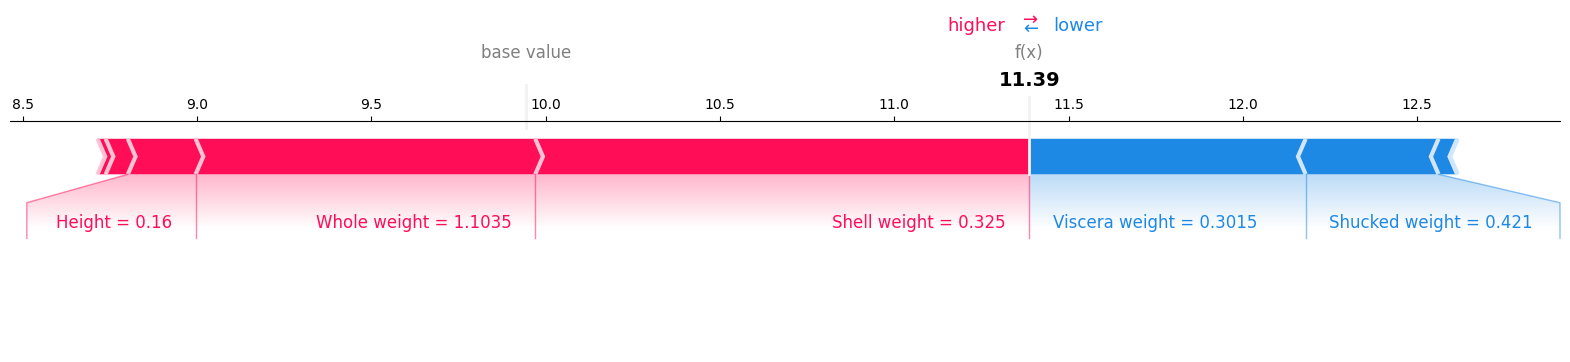

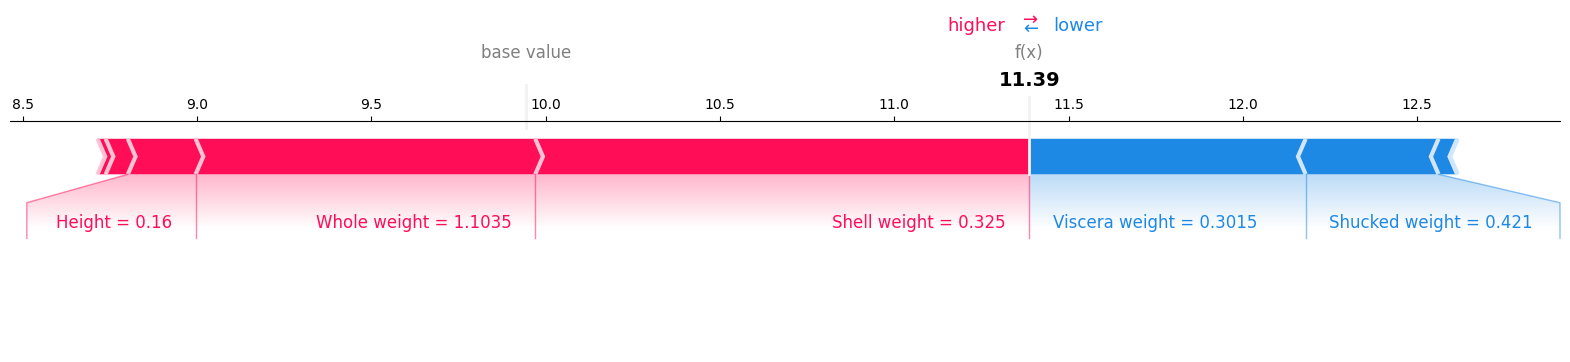

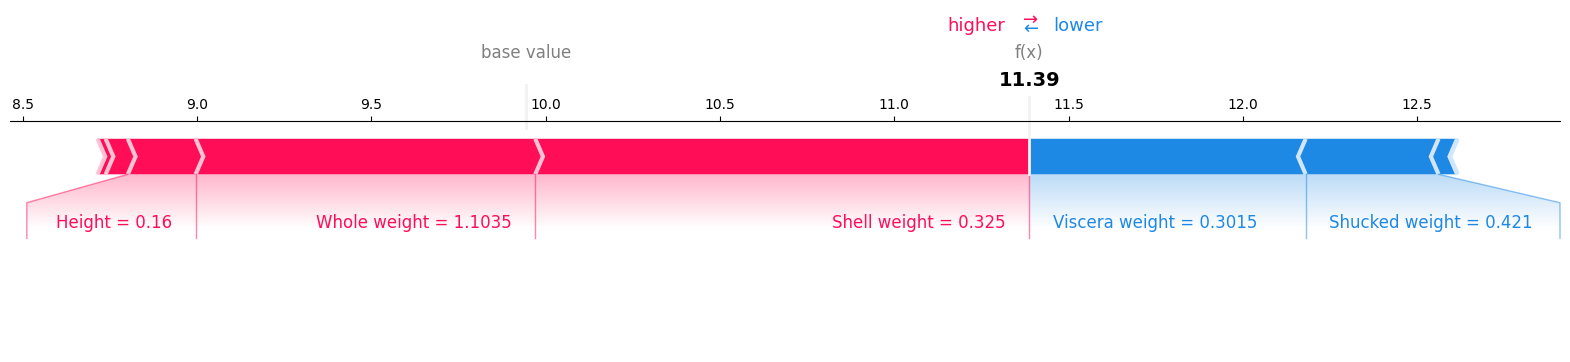

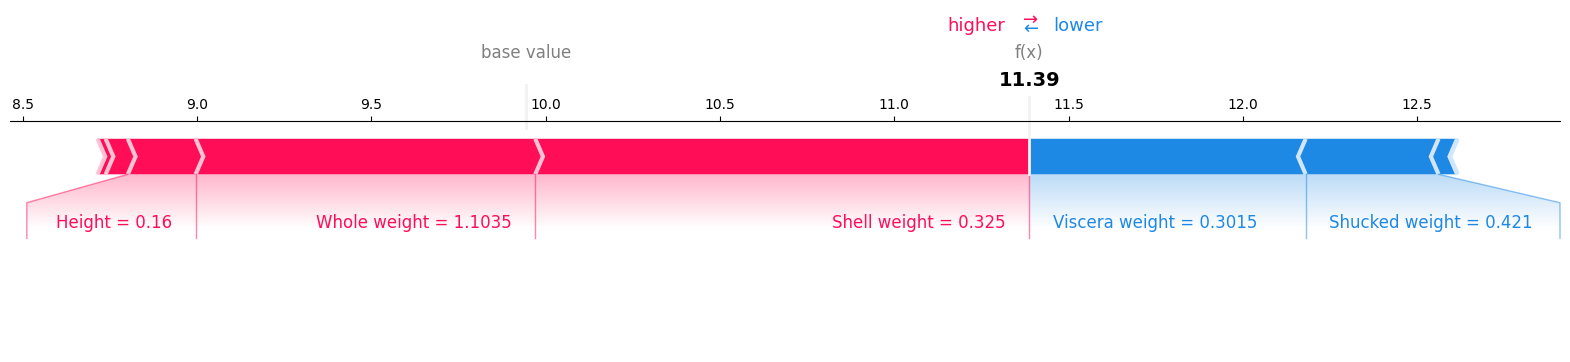

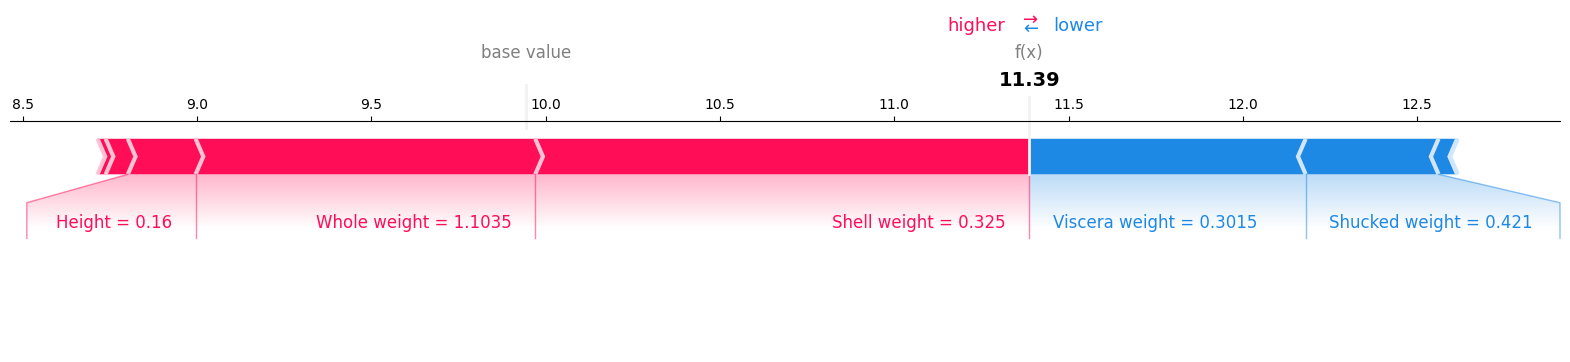

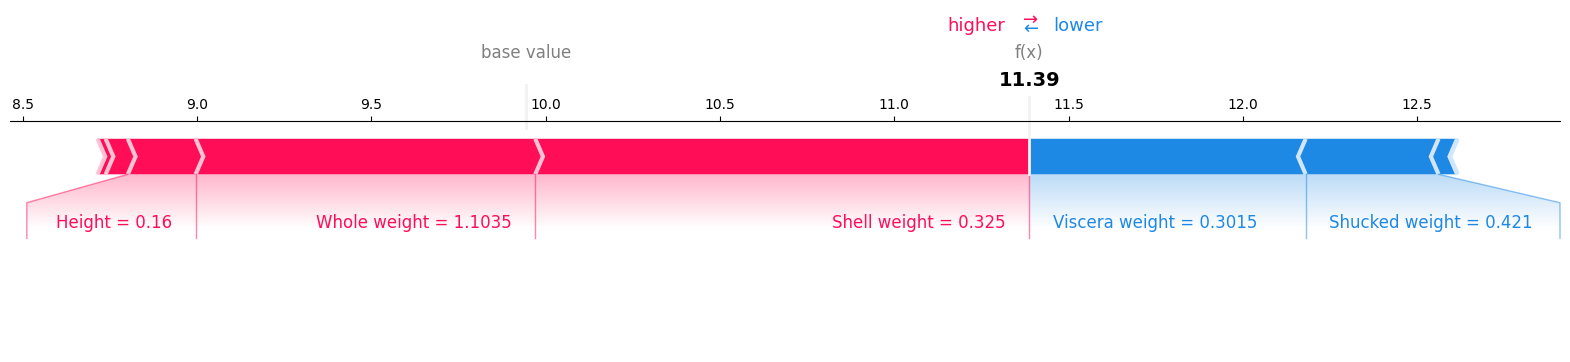

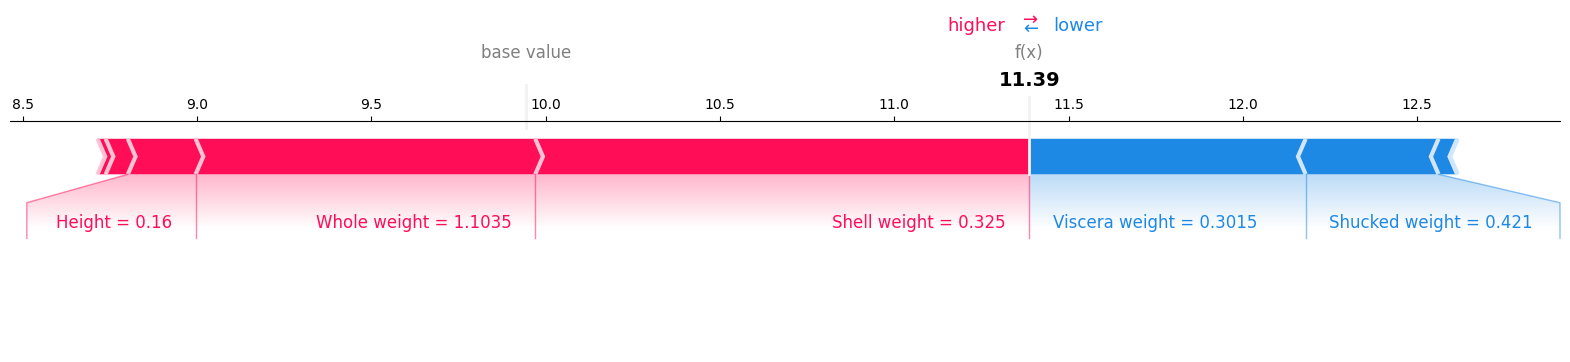

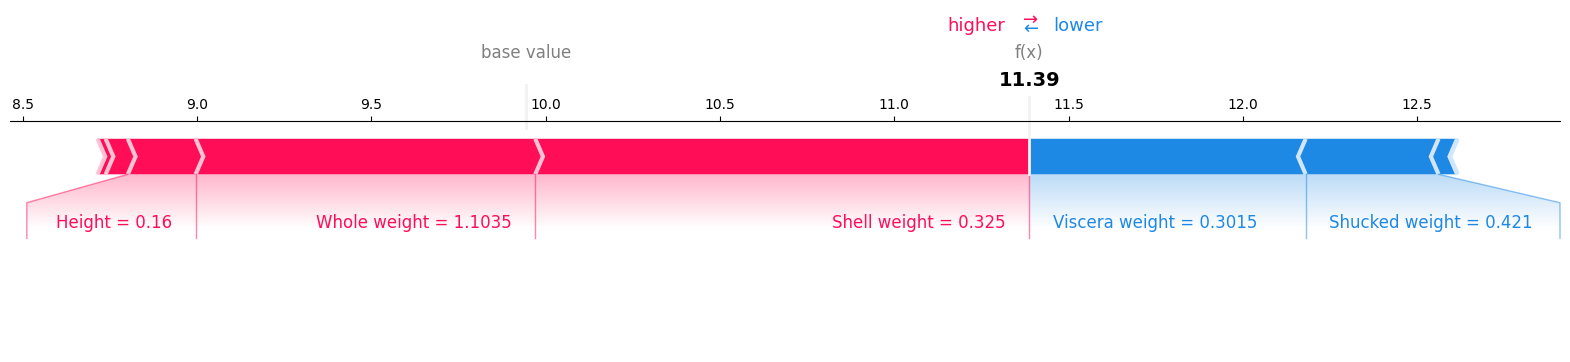

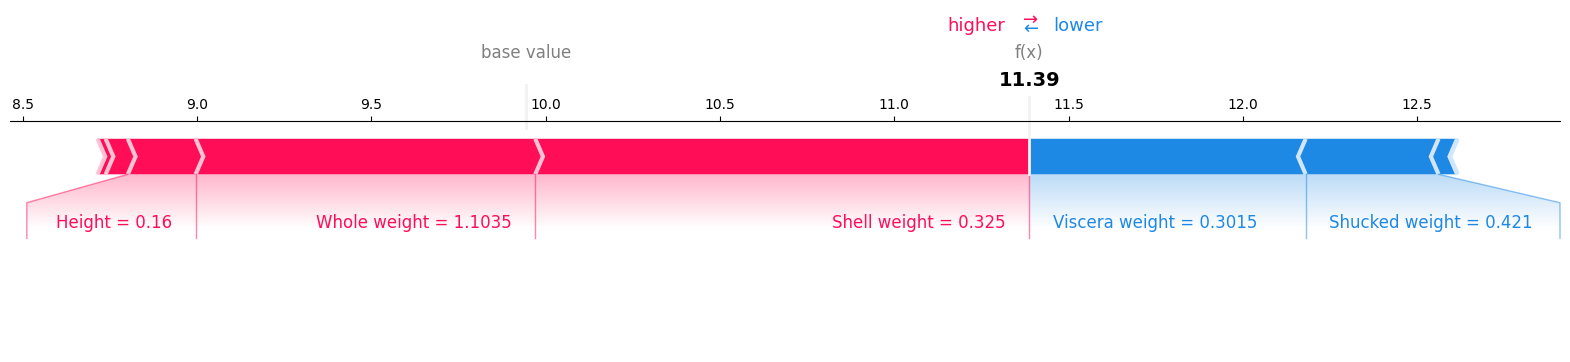

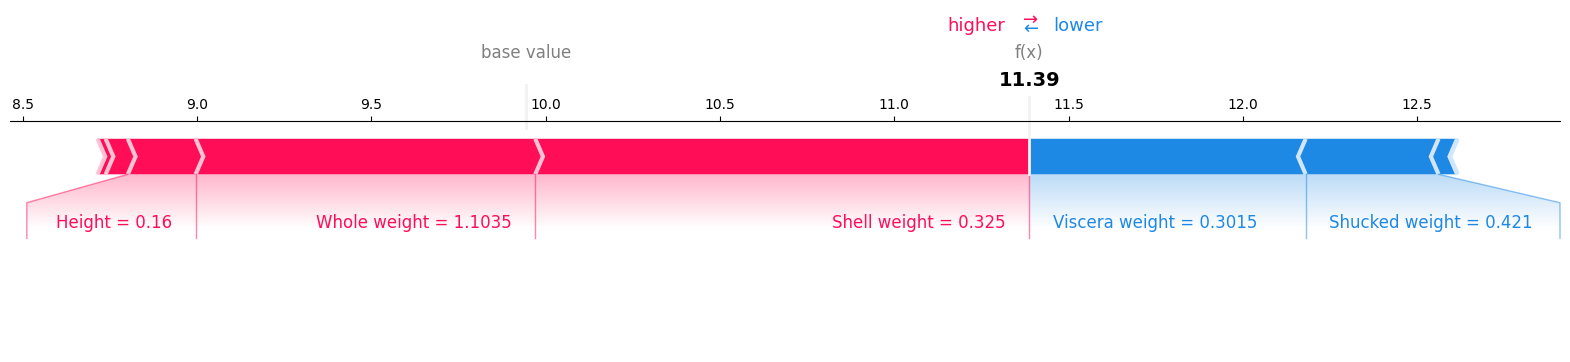

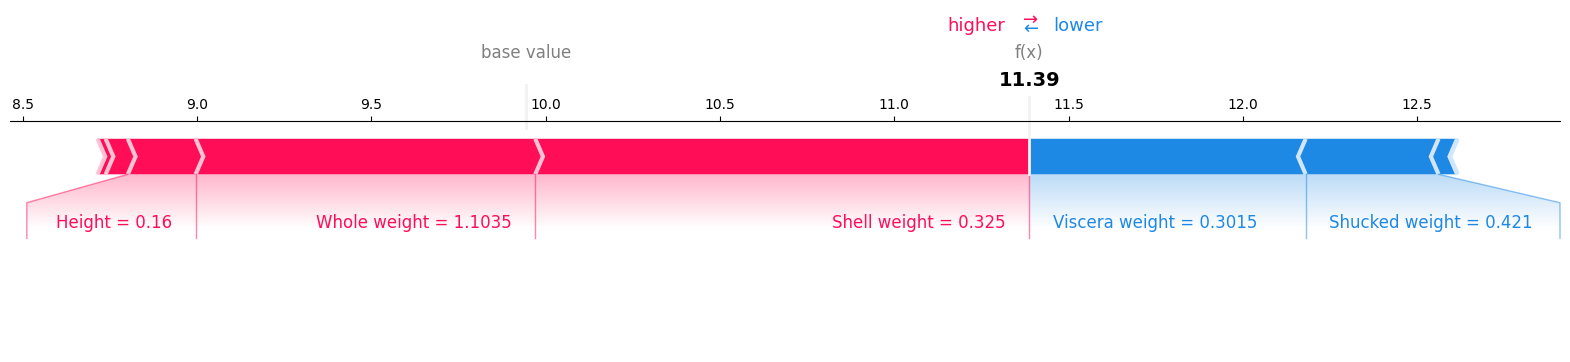

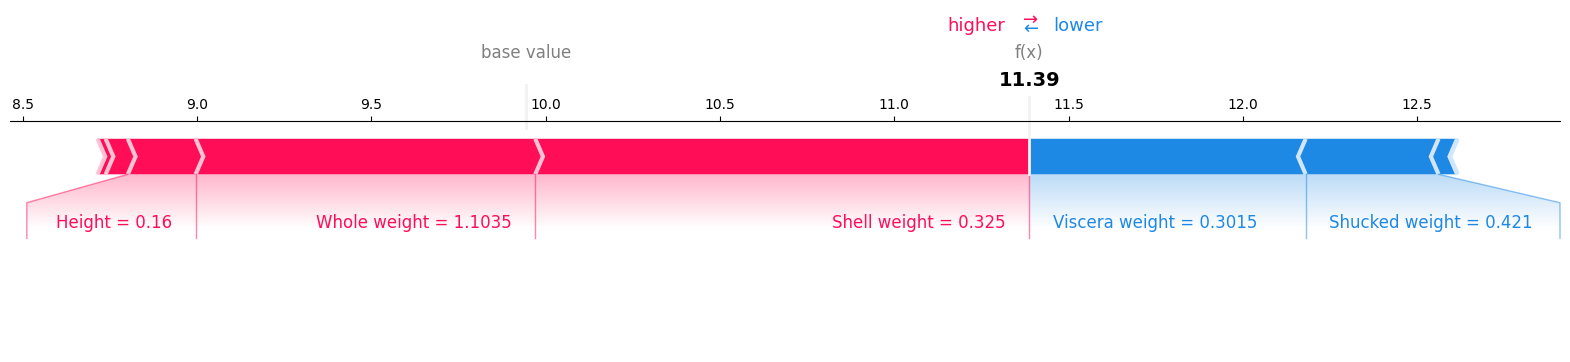

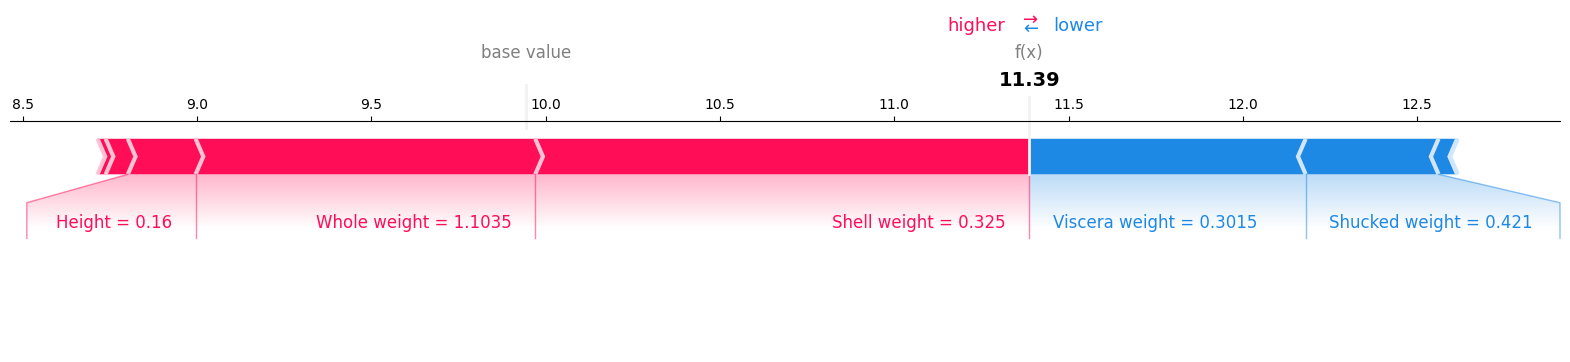

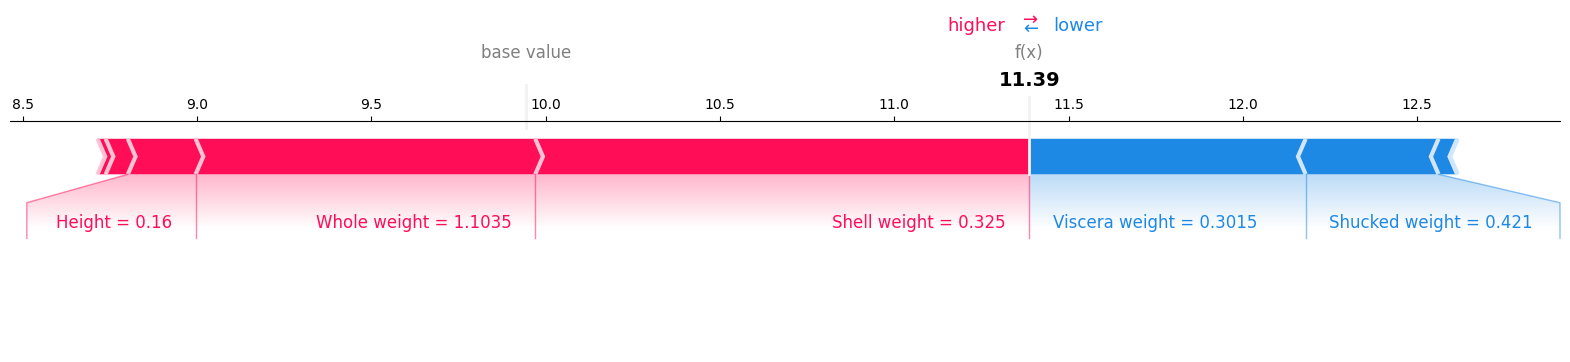

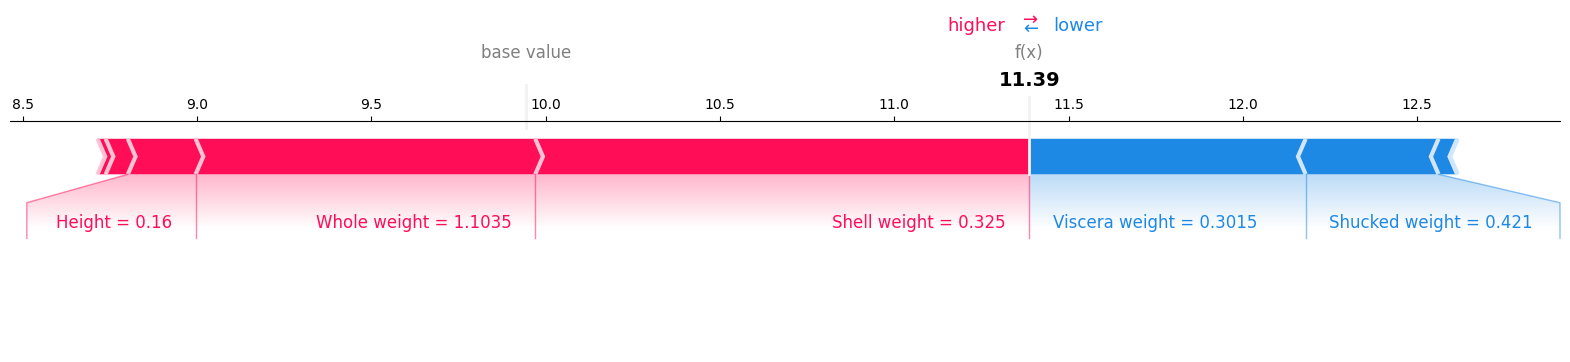

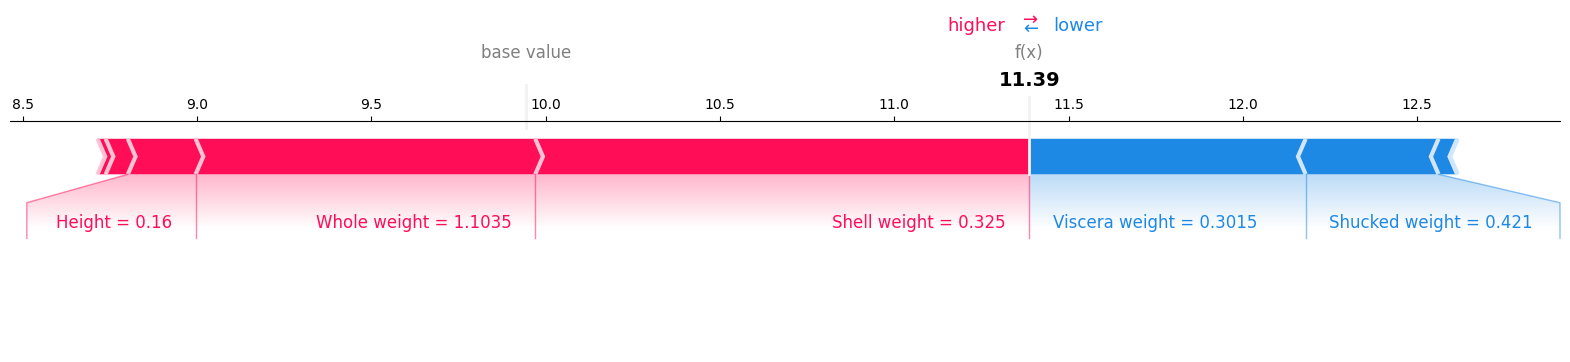

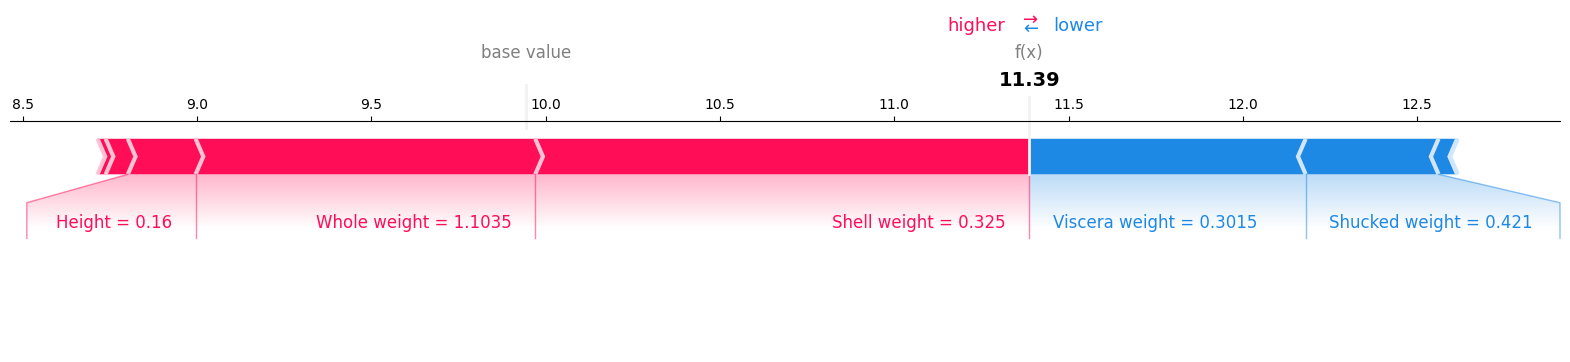

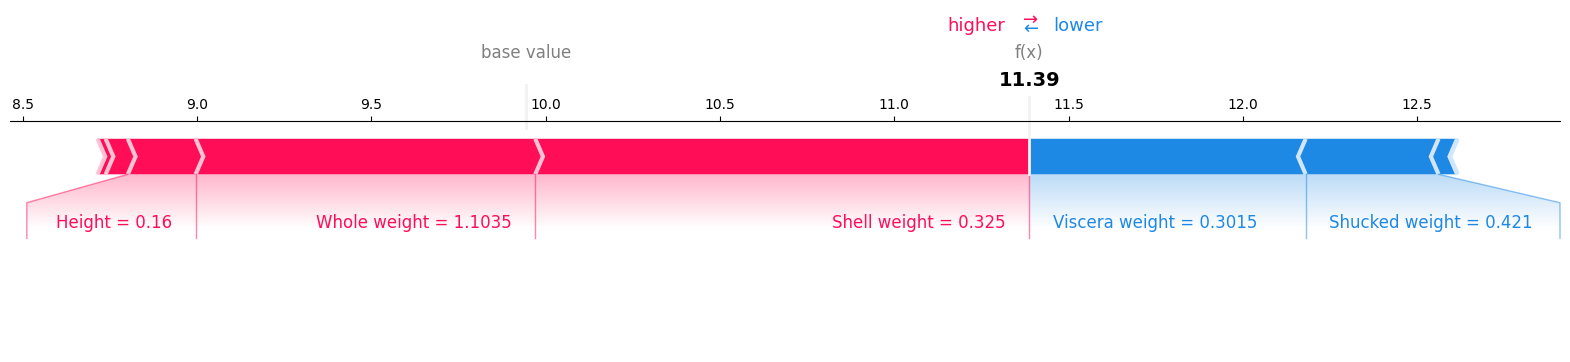

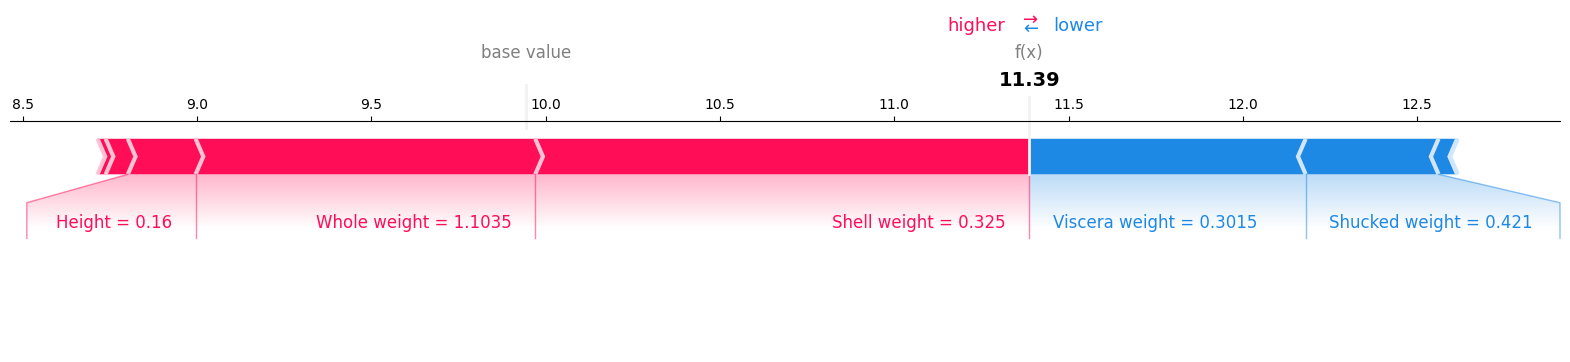

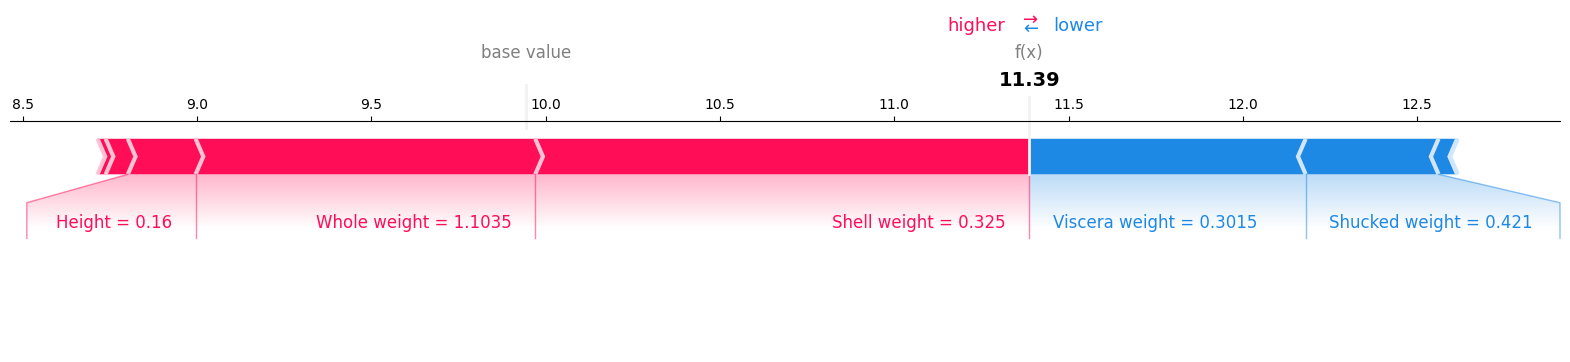

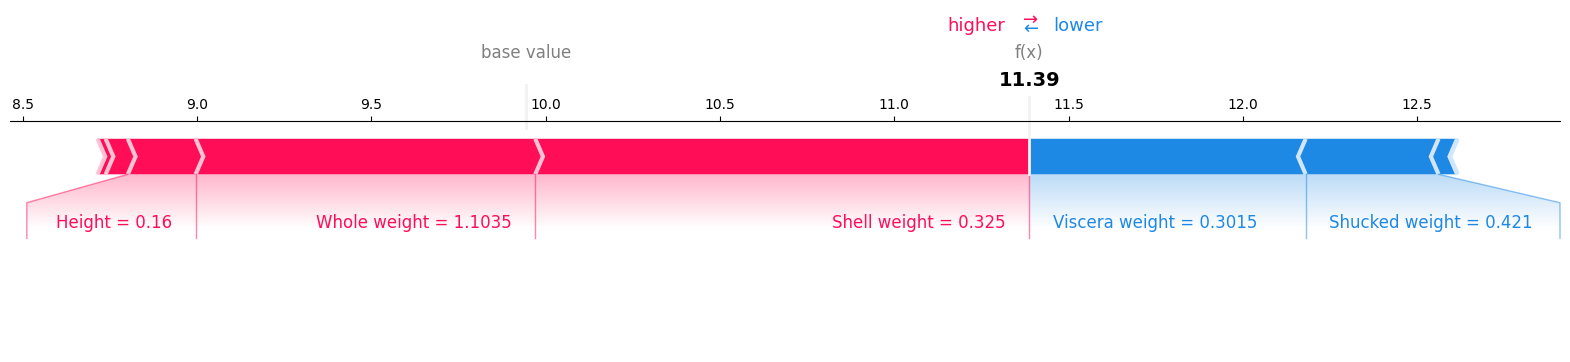

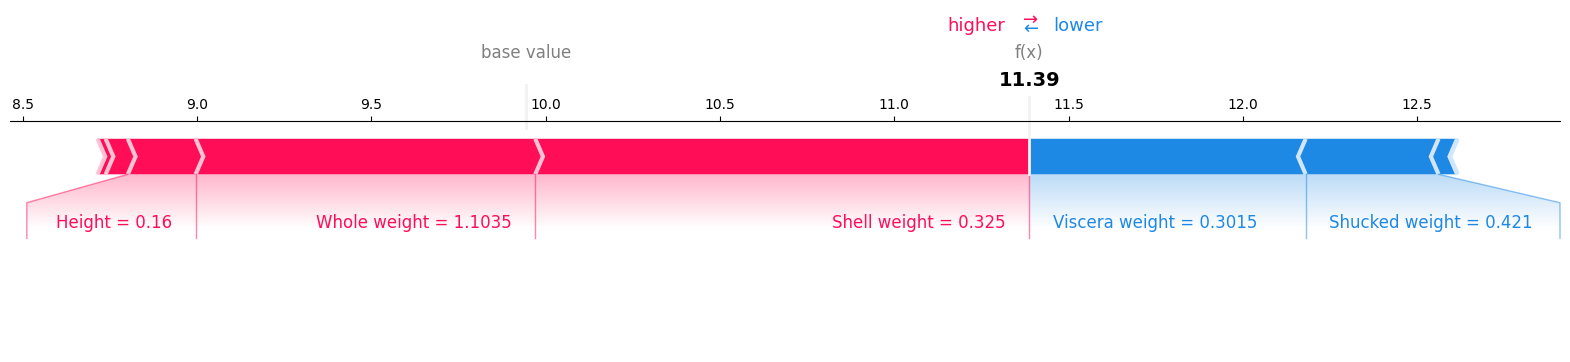

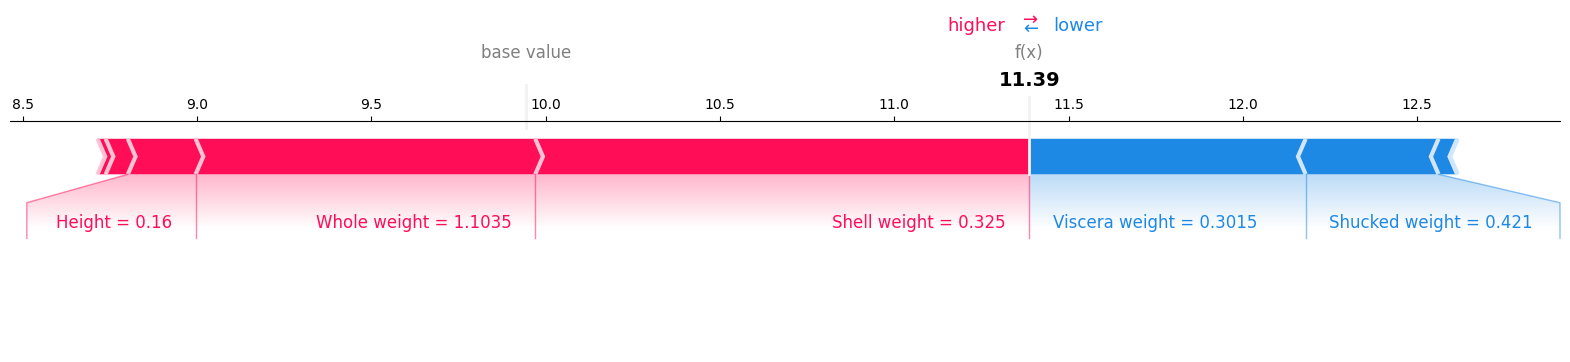

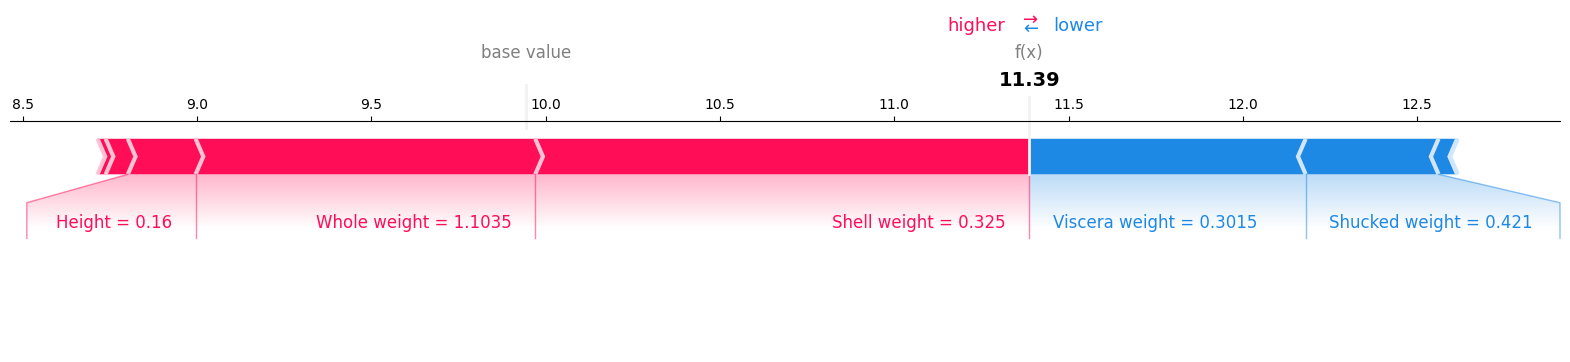

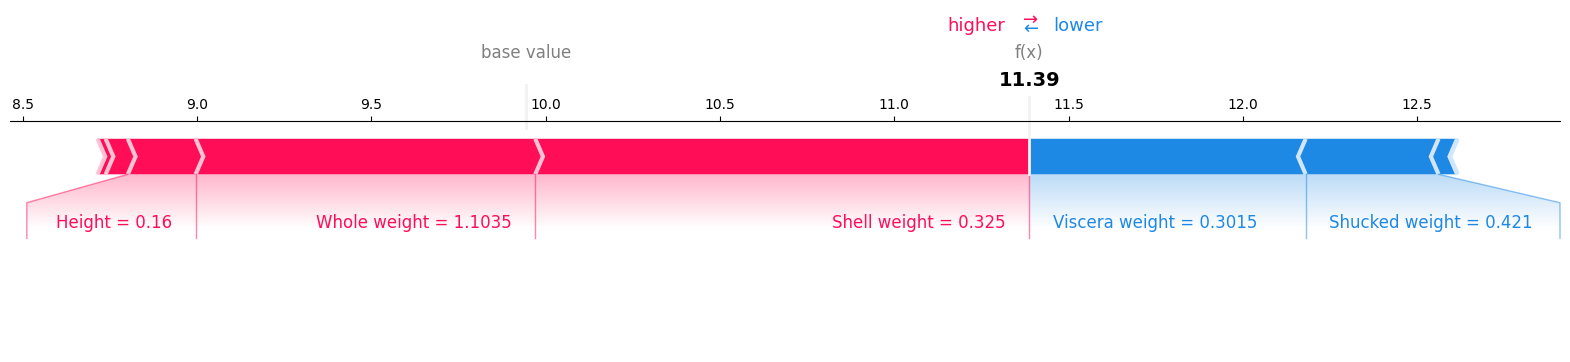

In [22]:
# If shap_values is an Explanation object, extract the values stacked plot
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values

# Initialize the SHAP JavaScript library
shap.initjs()

# Visualize the first 100 observations
for i in range(100):
    shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib=True)

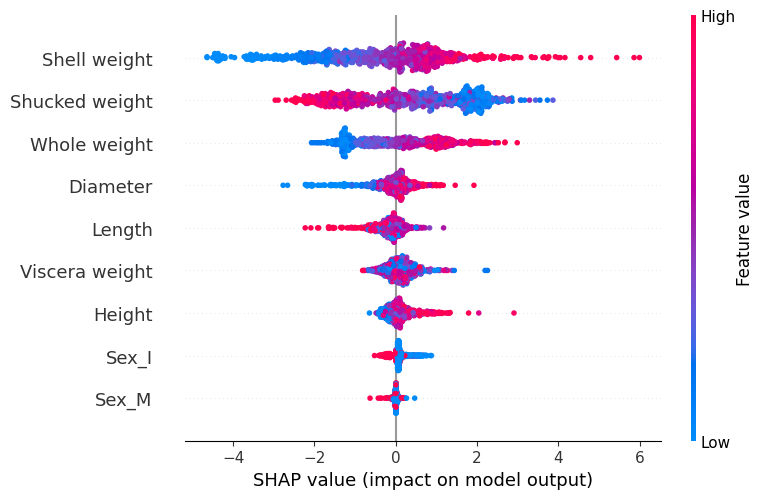

In [24]:
#mean shap plot
shap.summary_plot(shap_values, X_test)

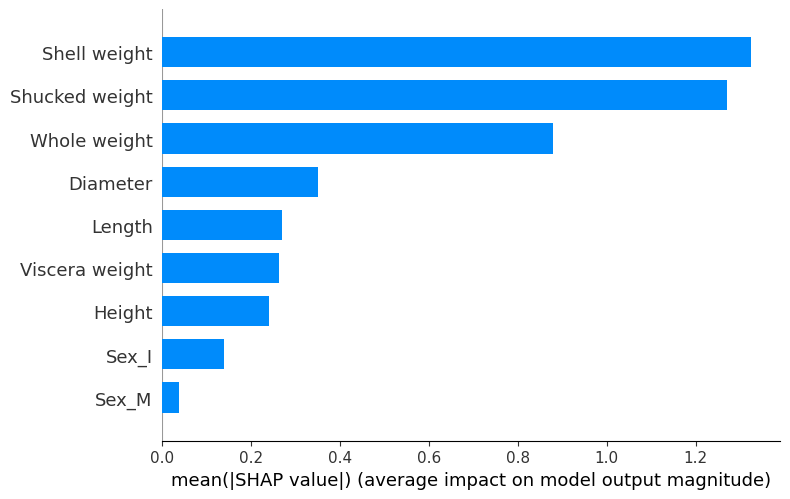

In [26]:
# Generate and display SHAP summary plot as a bar chart
shap.summary_plot(shap_values, X_test, plot_type="bar")

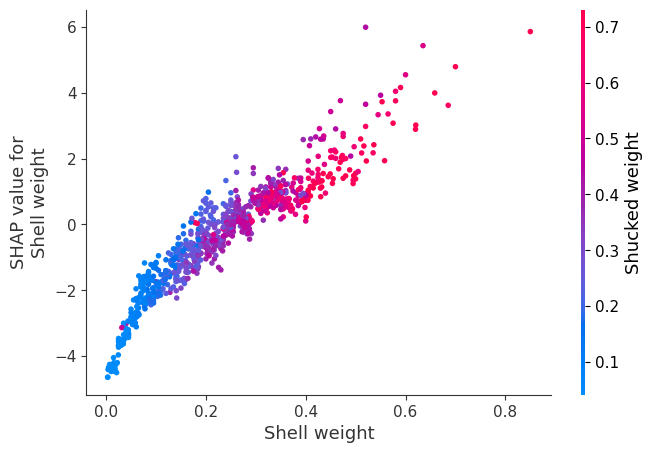

In [35]:
# Generate SHAP dependence plot for the "ShellWeight" feature
shap.dependence_plot("Shell weight", shap_values, X_test)